In [2]:
### ValDXer testing
import os
os.environ["HDXER_PATH"] = "/home/alexi/Documents/HDXer"
from ValDX.ValidationDX import ValDXer
from ValDX.VDX_Settings import Settings
import pandas as pd
import MDAnalysis as mda
from MDAnalysis.coordinates.XTC import XTCWriter
from pdbfixer import PDBFixer
from openmm.app import PDBFile


settings = Settings(name='test_full0.5')
settings.replicates = 1
settings.gamma_range = (2,6)
settings.train_frac = 0.5
settings.RW_exponent = [0]
settings.split_mode = 'R3'
settings.stride = 1000
# settings.HDXer_stride = 10000

settings.RW_do_reweighting = False
settings.RW_do_params = True
import pickle

VDX = ValDXer(settings)
expt_name = 'Experimental'
test_name = "LXRa_test"


/home/alexi/Documents/ValDX


/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.50
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.51
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.52
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.53
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.54
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.55
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.56
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.57
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.58
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.59


In [2]:
### add code to read in sequence from CIF file instead of copying it manually

In [3]:
sequence = """MSLWLGAPVPDIPPDSAVELWKPGAQDASSQAQGGSSCILREEARMPHSAGGTAGVGLEAAEPTALLTRAEPPSEPTEIR
PQKRKKGPAPKMLGNELCSVCGDKASGFHYNVLSCEGCKGFFRRSVIKGAHYICHSGGHCPMDTYMRRKCQECRLRKCRQ
AGMREECVLSEEQIRLKKLKRQEEEQAHATSLPPRASSPPQILPQLSPEQLGMIEKLVAAQQQCNRRSFSDRLRVTPWPM
APDPHSREARQQRFAHFTELAIVSVQEIVDFAKQLPGFLQLSREDQIALLKTSAIEVMLLETSRRYNPGSESITFLKDFS
YNREDFAKAGLQVEFINPIFEFSRAMNELQLNDAEFALLIAISIFSADRPNVQDQLQVERLQHTYVEALHAYVSIHHPHD
RLMFPRMLMKLVSLRTLSSVHSEQVFALRLQDKKLPPLLSEIWDVHE"""

# strip sequence of non letters
sequence = ''.join([i for i in sequence if i.isalpha()])

print(sequence)

MSLWLGAPVPDIPPDSAVELWKPGAQDASSQAQGGSSCILREEARMPHSAGGTAGVGLEAAEPTALLTRAEPPSEPTEIRPQKRKKGPAPKMLGNELCSVCGDKASGFHYNVLSCEGCKGFFRRSVIKGAHYICHSGGHCPMDTYMRRKCQECRLRKCRQAGMREECVLSEEQIRLKKLKRQEEEQAHATSLPPRASSPPQILPQLSPEQLGMIEKLVAAQQQCNRRSFSDRLRVTPWPMAPDPHSREARQQRFAHFTELAIVSVQEIVDFAKQLPGFLQLSREDQIALLKTSAIEVMLLETSRRYNPGSESITFLKDFSYNREDFAKAGLQVEFINPIFEFSRAMNELQLNDAEFALLIAISIFSADRPNVQDQLQVERLQHTYVEALHAYVSIHHPHDRLMFPRMLMKLVSLRTLSSVHSEQVFALRLQDKKLPPLLSEIWDVHE


In [4]:
# convert sequence to FASTA format
def write_fasta(sequence, header, file_name):
    """
    Writes a single-letter amino acid sequence to a FASTA file.
    
    Parameters:
    - sequence: A string containing the amino acid sequence.
    - header: A string to be used as the header in the FASTA file.
    - file_name: The name of the FASTA file to be created.
    """
    with open(file_name, 'w') as fasta_file:
        # Write the header with the '>' symbol
        fasta_file.write(f">{header}\n")
        
        # Write the sequence in lines of 80 characters
        for i in range(0, len(sequence), 80):
            fasta_file.write(sequence[i:i+80] + "\n")


In [5]:
fasta_path = os.path.join("raw_data", "LXRalpha", 'LXRa.fasta')
write_fasta(sequence, 'LXRa', fasta_path)

In [40]:
raw_hdx_path = "raw_data/LXRalpha/LXRalpha_APO/LXRalpha.csv"

raw_hdx = pd.read_csv(raw_hdx_path)

In [41]:
raw_hdx['UptakeFraction'] = raw_hdx['Uptake'] / raw_hdx['MaxUptake']

columns_to_drop = ["Protein", "Sequence", "Fragment", "Modification", "State", "MaxUptake", "Uptake", "MHP", "Center", "Center SD", "Uptake", "Uptake SD", "RT", "RT SD"]

raw_hdx = raw_hdx.drop(columns=columns_to_drop)

raw_hdx.head()

Start  End  Exposure  UptakeFraction
0    200  213       0.5        0.420276
1    200  213      10.0        0.439171
2    202  206       0.5        0.444671
3    202  206      10.0        0.541777
4    204  213       0.5        0.515639

In [42]:

# pivot exposure and uptake fraction
raw_hdx = raw_hdx.groupby(['Start', 'End', 'Exposure'])['UptakeFraction'].mean().reset_index()

raw_hdx.head()


Start  End  Exposure  UptakeFraction
0    200  213       0.5        0.420276
1    200  213      10.0        0.439171
2    202  206       0.5        0.444671
3    202  206      10.0        0.541777
4    204  213       0.5        0.515639

In [43]:

# print entire dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
print(raw_hdx)

     Start  End  Exposure  UptakeFraction
0      200  213       0.5        0.420276
1      200  213      10.0        0.439171
2      202  206       0.5        0.444671
3      202  206      10.0        0.541777
4      204  213       0.5        0.515639
5      204  213      10.0        0.549359
6      214  219       0.5        0.397378
7      214  219      10.0        0.491183
8      218  233       0.5        0.320350
9      218  233      10.0        0.337513
10     220  229       0.5        0.287265
11     220  229      10.0        0.304268
12     220  233       0.5        0.289530
13     220  233      10.0        0.301570
14     221  233       0.5        0.290460
15     221  233      10.0        0.308812
16     222  233       0.5        0.313111
17     222  233      10.0        0.329153
18     234  240       0.5        0.394215
19     234  240      10.0        0.418820
20     234  248       0.5        0.231529
21     234  248      10.0        0.255082
22     234  251       0.5        0

In [44]:
# conver to HDXer format ie start, end, exposure_1, exposure_2 

# pivot so that exposure time is the column name drop the exposure column
hdx = raw_hdx.pivot(index=['Start', 'End'], columns='Exposure', values='UptakeFraction').reset_index()

# change Start to ResStr and End to ResEnd
hdx = hdx.rename(columns={'Start': 'ResStr', 'End': 'ResEnd'})

# drop the exposure column
hdx.columns.name = None

print(hdx)


    ResStr  ResEnd       0.5      10.0
0      200     213  0.420276  0.439171
1      202     206  0.444671  0.541777
2      204     213  0.515639  0.549359
3      214     219  0.397378  0.491183
4      218     233  0.320350  0.337513
5      220     229  0.287265  0.304268
6      220     233  0.289530  0.301570
7      221     233  0.290460  0.308812
8      222     233  0.313111  0.329153
9      234     240  0.394215  0.418820
10     234     248  0.231529  0.255082
11     234     251  0.228909  0.268843
12     249     257  0.181442  0.220665
13     261     266  0.448474  0.513589
14     261     267  0.446068  0.523586
15     267     271  0.035227  0.165512
16     271     278  0.098404  0.267671
17     272     278  0.117940  0.280327
18     279     286  0.231769  0.293596
19     282     289  0.101470  0.171960
20     282     290  0.088867  0.180641
21     290     294  0.332861  0.404824
22     290     296  0.306672  0.395630
23     295     299  0.051759  0.145845
24     299     311  0.260

In [45]:
# subtract 208 from the residue numbers
hdx['ResStr'] = hdx['ResStr'] - 207
hdx['ResEnd'] = hdx['ResEnd'] - 207

print(hdx)

    ResStr  ResEnd       0.5      10.0
0       -7       6  0.420276  0.439171
1       -5      -1  0.444671  0.541777
2       -3       6  0.515639  0.549359
3        7      12  0.397378  0.491183
4       11      26  0.320350  0.337513
5       13      22  0.287265  0.304268
6       13      26  0.289530  0.301570
7       14      26  0.290460  0.308812
8       15      26  0.313111  0.329153
9       27      33  0.394215  0.418820
10      27      41  0.231529  0.255082
11      27      44  0.228909  0.268843
12      42      50  0.181442  0.220665
13      54      59  0.448474  0.513589
14      54      60  0.446068  0.523586
15      60      64  0.035227  0.165512
16      64      71  0.098404  0.267671
17      65      71  0.117940  0.280327
18      72      79  0.231769  0.293596
19      75      82  0.101470  0.171960
20      75      83  0.088867  0.180641
21      83      87  0.332861  0.404824
22      83      89  0.306672  0.395630
23      88      92  0.051759  0.145845
24      92     104  0.260

In [50]:
# drop rows if ResStr or ResEnd is less than 1
hdx = hdx[hdx['ResStr'] > 0]
hdx = hdx[hdx['ResEnd'] > 0]

print(hdx)

    ResStr  ResEnd      0.5     10.0
3        7      12  0.39738  0.49118
4       11      26  0.32035  0.33751
5       13      22  0.28726  0.30427
6       13      26  0.28953  0.30157
7       14      26  0.29046  0.30881
8       15      26  0.31311  0.32915
9       27      33  0.39422  0.41882
10      27      41  0.23153  0.25508
11      27      44  0.22891  0.26884
12      42      50  0.18144  0.22067
13      54      59  0.44847  0.51359
14      54      60  0.44607  0.52359
15      60      64  0.03523  0.16551
16      64      71  0.09840  0.26767
17      65      71  0.11794  0.28033
18      72      79  0.23177  0.29360
19      75      82  0.10147  0.17196
20      75      83  0.08887  0.18064
21      83      87  0.33286  0.40482
22      83      89  0.30667  0.39563
23      88      92  0.05176  0.14584
24      92     104  0.26090  0.32509
25      93     104  0.27397  0.33018
26      93     105  0.27987  0.33423
27      93     107  0.30799  0.35171
28      96     104  0.29735  0.33147
2

In [51]:

hdx = hdx.round(5)
hdx.to_csv(os.path.join("raw_data", "LXRalpha", 'LXRa_APO_5AVI.dat'), sep=' ', index=False)


In [52]:
segs = hdx[['ResStr', 'ResEnd']].drop_duplicates().sort_values(by=['ResStr', 'ResEnd']).reset_index(drop=True)


In [53]:

# convert to list of tuples
segs = [tuple(x) for x in segs.values]

print(segs)


[(7, 12), (11, 26), (13, 22), (13, 26), (14, 26), (15, 26), (27, 33), (27, 41), (27, 44), (42, 50), (54, 59), (54, 60), (60, 64), (64, 71), (65, 71), (72, 79), (75, 82), (75, 83), (83, 87), (83, 89), (88, 92), (92, 104), (93, 104), (93, 105), (93, 107), (96, 104), (105, 109), (112, 117), (112, 119), (112, 124), (113, 119), (114, 119), (118, 124), (120, 124), (128, 133), (128, 134), (129, 134), (134, 141), (135, 141), (135, 142), (142, 146), (142, 148), (142, 149), (143, 149), (145, 149), (153, 158), (158, 169), (159, 169), (159, 170), (159, 171), (161, 169), (164, 173), (170, 174), (170, 177), (170, 178), (170, 179), (170, 180), (170, 182), (172, 182), (175, 182), (178, 182), (198, 202), (201, 206), (201, 211), (205, 219), (205, 220), (207, 213), (207, 219), (207, 220), (208, 213), (208, 220), (210, 219), (214, 219), (214, 220), (220, 232), (220, 233), (220, 234), (221, 232), (221, 233), (221, 235), (224, 232), (233, 240), (235, 240), (236, 240)]


In [54]:


# write list as new lines with space delimiter
with open(os.path.join("raw_data", "LXRalpha", 'LXRa_APO_5AVI_segs.txt'), 'w') as f:
    for item in segs:
        f.write("%s\n" % ' '.join(map(str, item)))

In [ ]:

# BPTI_dir = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/LXRalpha/LXRalpha_APO"

# sim_dir = os.path.join(BPTI_dir, "alphafold_quick")

# pdb_list = [f for f in os.listdir(sim_dir) if f.endswith('.pdb')]

# print(pdb_list) 


# H_sim_dir = os.path.join(BPTI_dir, "alphafold_H")

# os.makedirs(H_sim_dir, exist_ok=True)

# for pdb in pdb_list:
#     fixer = PDBFixer(os.path.join(sim_dir, pdb))
#     fixer.addMissingHydrogens(7.0)
#     H_pdb_name = pdb.replace('.pdb', '_H.pdb')
#     PDBFile.writeFile(fixer.topology, fixer.positions, open(os.path.join(H_sim_dir, H_pdb_name), 'w'), keepIds=True)

# pdb_list = [f for f in os.listdir(H_sim_dir) if f.endswith('.pdb')]



Generate conformations with Alphafold

# need to find out how to generate a wide range of conformations

In [24]:
def pre_process_main():
    # BPTI data
    BPTI_dir = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/LXRalpha/LXRalpha_APO"
    BPTI_dir = "/home/alexi/Documents/ValDX/raw_data/LXRalpha/LXRalpha_APO"
    # BPTI_dir = "/home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI"

    os.listdir(BPTI_dir)

    segs_name = "LXRa_APO_5AVI_segs.txt"
    segs_path = os.path.join(BPTI_dir, segs_name)

    hdx_name = "LXRa_APO_5AVI.dat"
    hdx_path = os.path.join(BPTI_dir, hdx_name)
    print(hdx_path)

    rates_name = "out__train_MD_Simulated_1Intrinsic_rates.dat"
    rates_path = os.path.join(BPTI_dir, rates_name)
    sim_name = 'LXRa_AF'

    sim_dir = os.path.join(BPTI_dir, "alphafold_quick")

    pdb_list = [f for f in os.listdir(sim_dir) if f.endswith('.pdb')]

    print(pdb_list) 


    H_sim_dir = os.path.join(BPTI_dir, "alphafold_H")

    os.makedirs(H_sim_dir, exist_ok=True)

    for pdb in pdb_list:
        continue
        fixer = PDBFixer(os.path.join(sim_dir, pdb))
        fixer.addMissingHydrogens(7.0)
        H_pdb_name = pdb.replace('.pdb', '_H.pdb')
        PDBFile.writeFile(fixer.topology, fixer.positions, open(os.path.join(H_sim_dir, H_pdb_name), 'w'), keepIds=True)

    pdb_list = [f for f in os.listdir(H_sim_dir) if f.endswith('.pdb')]


    top_path = os.path.join(H_sim_dir, pdb_list[0])
    top_path = "/home/alexi/Documents/ValDX/raw_data/raw_pdbs/clean_pdbs/5AVI_chain_A_fixed.pdb"
    pdb_paths = [os.path.join(H_sim_dir, i) for i in pdb_list]

    print(top_path)
    print(pdb_paths)


    small_traj_name = top_path.replace(".pdb","_small.xtc")
    small_traj_path = os.path.join(sim_dir, small_traj_name)

    u = mda.Universe(top_path)


        
    with XTCWriter(small_traj_path, n_atoms=u.atoms.n_atoms) as W:
        for ts in u.trajectory:
                W.write(u.atoms)
                W.write(u.atoms)

    # traj_paths = [os.path.join(sim_dir, i) for i in os.listdir(sim_dir) if i.endswith(".pdb")]
    
    traj_paths = [small_traj_path]

    print(traj_paths)
    return hdx_path, segs_path, rates_path, top_path, traj_paths, sim_name, expt_name, test_name


In [25]:
hdx_path, segs_path, rates_path, top_path, traj_paths, sim_name, expt_name, test_name = pre_process_main()

/home/alexi/Documents/ValDX/raw_data/LXRalpha/LXRalpha_APO/LXRa_APO_5AVI.dat
['LXRa_unrelaxed_rank_002_alphafold2_ptm_model_3_seed_000.pdb', 'LXRa_unrelaxed_rank_003_alphafold2_ptm_model_5_seed_000.pdb', 'LXRa_unrelaxed_rank_005_alphafold2_ptm_model_2_seed_000.pdb', 'LXRa_unrelaxed_rank_004_alphafold2_ptm_model_1_seed_000.pdb', 'LXRa_unrelaxed_rank_001_alphafold2_ptm_model_4_seed_000.pdb']
/home/alexi/Documents/ValDX/raw_data/raw_pdbs/clean_pdbs/5AVI_chain_A_fixed.pdb
['/home/alexi/Documents/ValDX/raw_data/LXRalpha/LXRalpha_APO/alphafold_H/LXRa_unrelaxed_rank_002_alphafold2_ptm_model_3_seed_000_H.pdb', '/home/alexi/Documents/ValDX/raw_data/LXRalpha/LXRalpha_APO/alphafold_H/LXRa_unrelaxed_rank_004_alphafold2_ptm_model_1_seed_000_H.pdb', '/home/alexi/Documents/ValDX/raw_data/LXRalpha/LXRalpha_APO/alphafold_H/LXRa_unrelaxed_rank_005_alphafold2_ptm_model_2_seed_000_H.pdb', '/home/alexi/Documents/ValDX/raw_data/LXRalpha/LXRalpha_APO/alphafold_H/LXRa_unrelaxed_rank_001_alphafold2_ptm_model_4

In [26]:
# # BPTI data
# BPTI_dir = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI"
# # BPTI_dir = "/home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI"


In [27]:
# expt_dir = os.path.join(BPTI_dir, "BPTI_expt_data")

# os.listdir(expt_dir)

# segs_name = "BPTI_residue_segs.txt"
# segs_path = os.path.join(expt_dir, segs_name)

# hdx_name = "BPTI_expt_dfracs.dat"
# hdx_path = os.path.join(expt_dir, hdx_name)
# print(hdx_path)

# rates_name = "BPTI_Intrinsic_rates.dat"
# rates_path = os.path.join(expt_dir, rates_name)


In [28]:
# sim_name = 'BPTI_MD'

# sim_dir = os.path.join(BPTI_dir, "BPTI_simulations")

# os.listdir(sim_dir)

# md_reps = 1
# rep_dirs = ["Run_"+str(i+1) for i in range(md_reps)]

# top_name = "bpti_5pti_eq6_protonly.gro"

# top_path = os.path.join(sim_dir, rep_dirs[0], top_name)

# traj_name = "bpti_5pti_reimg_protonly.xtc"

# traj_paths = [os.path.join(sim_dir, rep_dir, traj_name) for rep_dir in rep_dirs]

# print(top_path)
# print(traj_paths)




In [29]:
def run_split_test(split_mode, name, system):

    # settings.split_mode = 'R'
    settings.split_mode = split_mode
    settings.name = "_".join([name, split_mode])
    settings.times = [0.5,10.0]
    VDX = ValDXer(settings)

    VDX.load_HDX_data(HDX_path=hdx_path, SEG_path=segs_path, calc_name=expt_name)
    # VDX.load_intrinsic_rates(path=rates_path, calc_name=expt_name)

    VDX.load_structures(top_path=top_path, traj_paths=traj_paths, calc_name=test_name)

    run_outputs = VDX.run_VDX(calc_name=test_name, expt_name=expt_name)
    analysis_dump, df, name = VDX.dump_analysis()
    save_path = VDX.save_experiment()

    return run_outputs, analysis_dump, df, name, save_path

Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S0
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S1
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S2
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S3
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S4
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S5
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S6
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S7
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S8
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S9
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S10
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S11
Experiment name 

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/XDR.py:241: UserWarning: Reload offsets from trajectory
 ctime or size or n_atoms did not match
  warnings.warn("Reload offsets from trajectory\n "
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:733: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
python /home/alexi/Documents/HDXer/HDXer/calc_hdx.py -t /home/alexi/Documents/ValDX/raw_data/raw_pdbs/clean_pdbs/5AVI_chain_A_fixed_small.xtc -p /home/alexi/Documents/ValDX/raw_data/raw_pdbs/clean_pdbs/5AVI_chain_A_fixed.pdb -m BestVendruscolo -log /home/alexi/Documents/ValDX/data/AvsB_S12/train_LXRa_test_1/calc_hdx_train_LXRa_test_1.log -out /home/alexi/Documents/ValDX/data/AvsB_S12/train_LXRa_test_1/out__train_LXRa_test_1 -seg /home/alexi/Documents/ValDX/data/AvsB_S12/train_LXRa_test_1/train_residue_segs__LXRa_test_.txt -mopt "{ 'save_detailed' : True }" --times 0.5 10.0 -str 1
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
Residue predictions complete


/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaco

Path /home/alexi/Documents/ValDX/data/AvsB_S12/train_LXRa_test_1/out__train_LXRa_test_1Segment_average_fractions.dat
AVG: ncol = 4, len(names) = 2
Experimental LXRa_test True 1
/home/alexi/Documents/ValDX/data/AvsB_S12/train_LXRa_test_1/train_LXRa_test_1_expt_dfracs.dat
/home/alexi/Documents/ValDX/data/AvsB_S12/train_LXRa_test_1
/home/alexi/Documents/ValDX/data/AvsB_S12/train_LXRa_test_1/out__train_LXRa_test_1Intrinsic_rates.dat
REWIGHTING train_LXRa_test_1 with Exponent: 0
[{'do_reweight': False, 'do_params': True, 'stepfactor': 0.001, 'basegamma': 1, 'predictHDX_dir': ['/home/alexi/Documents/ValDX/data/AvsB_S12/train_LXRa_test_1'], 'kint_file': '/home/alexi/Documents/ValDX/data/AvsB_S12/train_LXRa_test_1/out__train_LXRa_test_1Intrinsic_rates.dat', 'exp_file': '/home/alexi/Documents/ValDX/data/AvsB_S12/train_LXRa_test_1/train_LXRa_test_1_expt_dfracs.dat', 'times': [0.5, 10.0], 'restart_interval': 100, 'out_prefix': '/home/alexi/Documents/ValDX/data/AvsB_S12/train_LXRa_test_1/reweighti

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

Recalculating no_weight_LXRa_test_1
    ResStr  ResEnd  peptide
0        6      11        0
1       10      25        1
2       12      21        2
3       12      25        3
4       13      25        4
5       14      25        5
6       26      32        6
7       26      40        7
8       26      43        8
9       41      49        9
10      53      58       10
11      53      59       11
12      59      63       12
13      63      70       13
14      64      70       14
15      71      78       15
16      74      81       16
17      74      82       17
18      82      86       18
19      82      88       19
20      87      91       20
21      91     103       21
22      92     103       22
23      92     104       23
24      92     106       24
25      95     103       25
26     104     108       26
27     111     116       27
28     111     118       28
29     111     123       29
30     112     118       30
31     113     118       31
32     117     123       32
33     119  

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))


Recalculating val_LXRa_test_1
    ResStr  ResEnd  peptide                                               path
0        6      11        0  /home/alexi/Documents/ValDX/data/AvsB_S12/val_...
1       12      21        2  /home/alexi/Documents/ValDX/data/AvsB_S12/val_...
2       64      70       14  /home/alexi/Documents/ValDX/data/AvsB_S12/val_...
3       71      78       15  /home/alexi/Documents/ValDX/data/AvsB_S12/val_...
4       74      81       16  /home/alexi/Documents/ValDX/data/AvsB_S12/val_...
5       74      82       17  /home/alexi/Documents/ValDX/data/AvsB_S12/val_...
6       82      86       18  /home/alexi/Documents/ValDX/data/AvsB_S12/val_...
7       82      88       19  /home/alexi/Documents/ValDX/data/AvsB_S12/val_...
8       87      91       20  /home/alexi/Documents/ValDX/data/AvsB_S12/val_...
9      144     148       44  /home/alexi/Documents/ValDX/data/AvsB_S12/val_...
10     152     157       45  /home/alexi/Documents/ValDX/data/AvsB_S12/val_...
11     157     168    

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))


LogPf_by_res shape
(92,)
[  1.41274227  69.6521787   70.7117354   70.7117354   69.6521787
  71.41810654  71.06492097  69.29899314  71.7712921   74.9499622
  68.94580757  70.35854984  71.06492097   4.2382268    2.82548453
   0.35318557  71.41810654 134.71294504  71.41810654  70.35854984
  70.7117354  135.77250174  70.7117354    5.65096906  70.35854984
   3.53185566   1.76592783   2.82548453   3.88504123   6.00415463
  15.54016492   6.35734019   4.2382268   72.47766323  77.0690756
  72.12447767  71.06492097  74.24359107  73.18403437  70.35854984
   4.2382268   72.47766323   9.88919586  70.7117354   67.53306531
   4.94459793   4.2382268    3.88504123  73.18403437  73.53721993
  75.30314776  73.18403437  72.47766323  73.18403437  75.30314776
  76.71589003  72.47766323  71.7712921   73.8904055   10.24238142
  10.94875256  13.77423709  13.06786595   6.71052576   2.47229896
   1.41274227  70.7117354    6.00415463   3.53185566   9.18282472
  14.48060822  74.9499622   73.53721993  73.8904055  1

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))


LogPf_by_res shape
(197,)
[  1.41274227  69.6521787   70.7117354   70.7117354   69.6521787
  71.41810654  71.06492097  69.29899314  71.7712921   74.9499622
  68.94580757  70.35854984  71.06492097   4.2382268    2.82548453
   0.35318557   0.35318557   0.           0.           0.
   1.41274227   0.           0.           1.41274227   1.41274227
   1.0595567    2.47229896   2.1191134    5.65096906   8.82963916
   8.82963916   6.71052576   1.0595567    4.2382268    4.59141236
   3.53185566   6.35734019  11.65512369  71.7712921   71.41810654
  71.06492097  71.06492097  71.7712921   72.47766323  72.12447767
  71.41810654  72.8308488   71.06492097  72.12447767  72.12447767
  71.41810654  71.41810654 134.71294504  71.41810654  70.35854984
  70.7117354  135.77250174  70.7117354    5.65096906  70.35854984
   3.53185566   1.76592783   2.82548453   3.88504123   6.00415463
  15.54016492   6.35734019   4.2382268   72.47766323  77.0690756
  72.12447767  71.06492097  74.24359107  73.18403437  70.3585

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/core/universe.py:817: DeprecationWarning: The bfactor topology attribute is only provided as an alias to the tempfactor attribute. It will be removed in 3.0. Please use the tempfactor attribute instead.
  warnings.warn(BFACTOR_WARNING, DeprecationWarning)
/home/alexi/anaconda3/envs/HDX

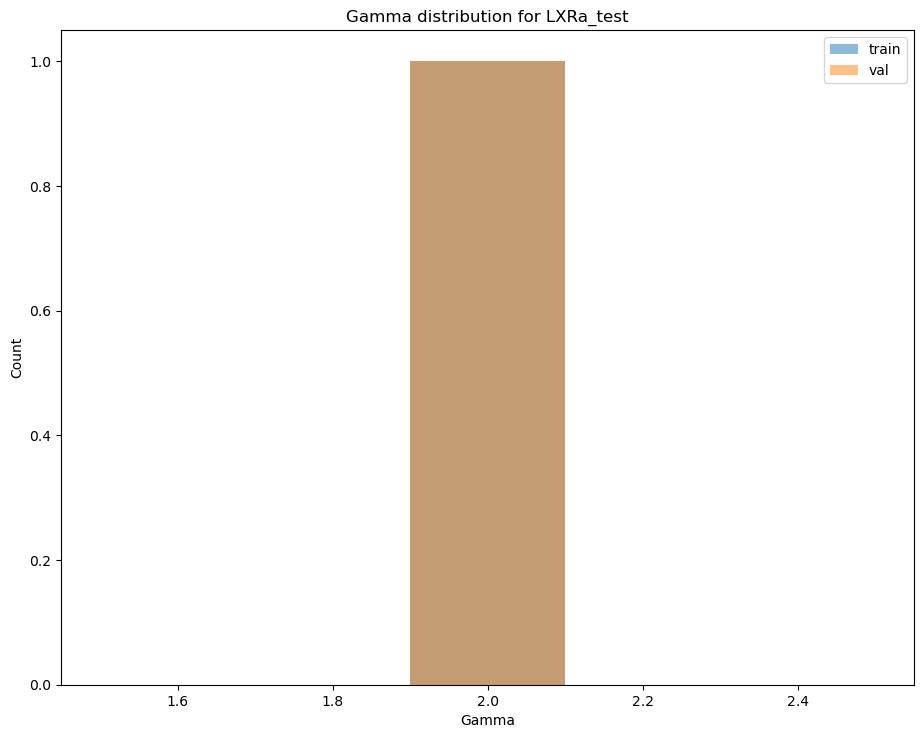

['train_LXRa_test_1']
['val_LXRa_test_1']
plot_dfracs_compare
          0.5      10.0  peptide          calc_name  ResStr  ResEnd  \
0    0.420280  0.439170        0       Experimental     NaN     NaN   
1    0.444670  0.541780        1       Experimental     NaN     NaN   
2    0.515640  0.549360        2       Experimental     NaN     NaN   
3    0.397380  0.491180        3       Experimental     NaN     NaN   
4    0.320350  0.337510        4       Experimental     NaN     NaN   
5    0.287260  0.304270        5       Experimental     NaN     NaN   
6    0.289530  0.301570        6       Experimental     NaN     NaN   
7    0.290460  0.308810        7       Experimental     NaN     NaN   
8    0.313110  0.329150        8       Experimental     NaN     NaN   
9    0.394220  0.418820        9       Experimental     NaN     NaN   
10   0.231530  0.255080       10       Experimental     NaN     NaN   
11   0.228910  0.268840       11       Experimental     NaN     NaN   
12   0.181440  

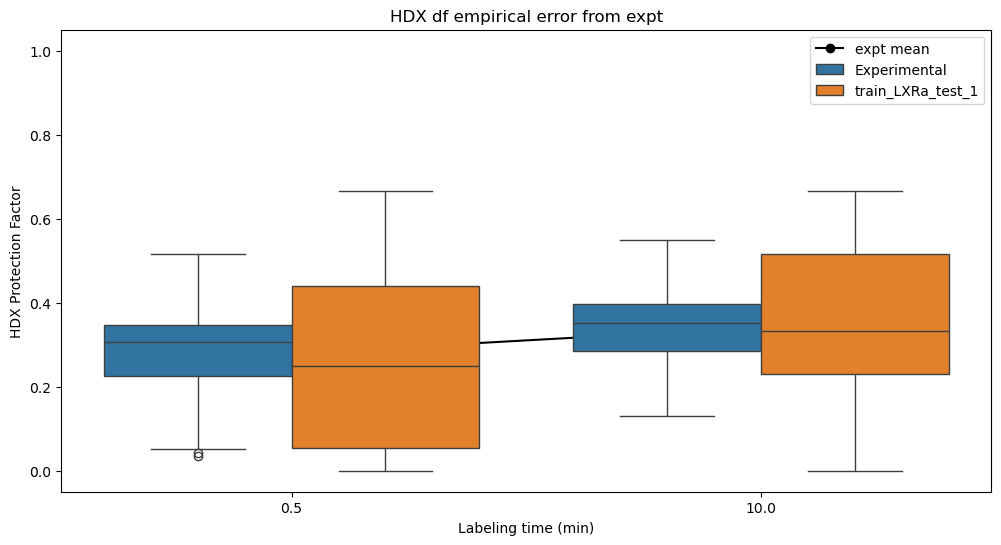

plot_dfracs_compare
          0.5      10.0  peptide          calc_name  ResStr  ResEnd  \
0    0.420280  0.439170        0       Experimental     NaN     NaN   
1    0.444670  0.541780        1       Experimental     NaN     NaN   
2    0.515640  0.549360        2       Experimental     NaN     NaN   
3    0.397380  0.491180        3       Experimental     NaN     NaN   
4    0.320350  0.337510        4       Experimental     NaN     NaN   
5    0.287260  0.304270        5       Experimental     NaN     NaN   
6    0.289530  0.301570        6       Experimental     NaN     NaN   
7    0.290460  0.308810        7       Experimental     NaN     NaN   
8    0.313110  0.329150        8       Experimental     NaN     NaN   
9    0.394220  0.418820        9       Experimental     NaN     NaN   
10   0.231530  0.255080       10       Experimental     NaN     NaN   
11   0.228910  0.268840       11       Experimental     NaN     NaN   
12   0.181440  0.220670       12       Experimental     N

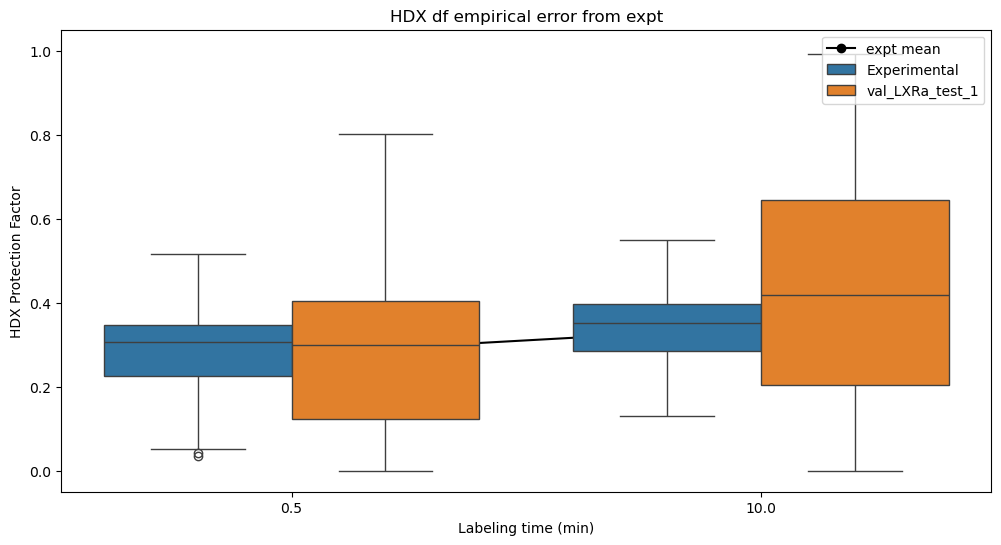

Restoring trainval peptide numbers
train_rep_names ['train_LXRa_test_1']
val_rep_names ['val_LXRa_test_1']
test_rep_names ['test_LXRa_test_1']
train_rep_peptides [6, 7, 8, 9, 10, 11, 12, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83]
val_rep_peptides [0, 2, 14, 15, 16, 17, 18, 19, 20, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 66, 69]
test_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83]
manual merge df
         0.5      10.0  peptide          calc_name  ResStr  ResEnd  \
0   0.600000  0.600000        6  train_LXRa_test_1     NaN     NaN   
1   0.454080  0.590820        7  train_LXRa_test_1     NaN     NaN  

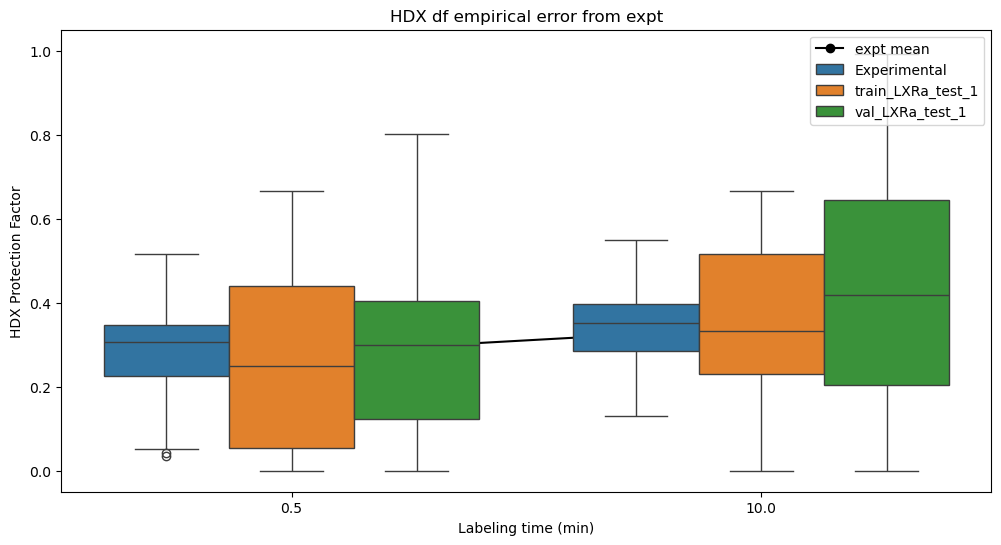

plotting paired errors
          0.5      10.0  peptide          calc_name  ResStr  ResEnd  \
0    0.420280  0.439170        0       Experimental     NaN     NaN   
1    0.444670  0.541780        1       Experimental     NaN     NaN   
2    0.515640  0.549360        2       Experimental     NaN     NaN   
3    0.397380  0.491180        3       Experimental     NaN     NaN   
4    0.320350  0.337510        4       Experimental     NaN     NaN   
5    0.287260  0.304270        5       Experimental     NaN     NaN   
6    0.289530  0.301570        6       Experimental     NaN     NaN   
7    0.290460  0.308810        7       Experimental     NaN     NaN   
8    0.313110  0.329150        8       Experimental     NaN     NaN   
9    0.394220  0.418820        9       Experimental     NaN     NaN   
10   0.231530  0.255080       10       Experimental     NaN     NaN   
11   0.228910  0.268840       11       Experimental     NaN     NaN   
12   0.181440  0.220670       12       Experimental   

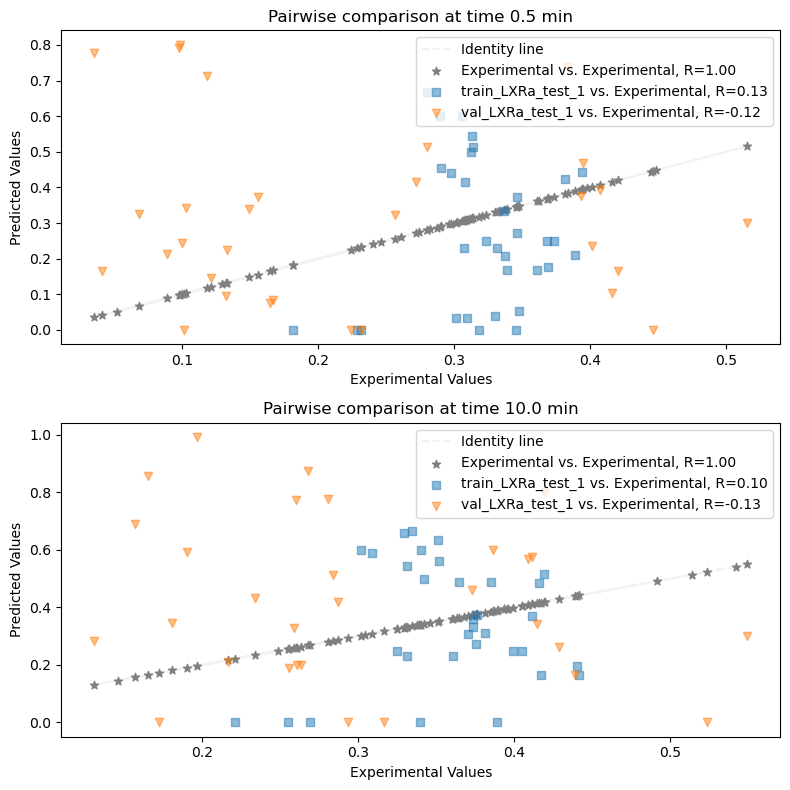

plotting paired trainval agreement
          0.5      10.0  peptide          calc_name  ResStr  ResEnd  \
0    0.420280  0.439170        0       Experimental     NaN     NaN   
1    0.444670  0.541780        1       Experimental     NaN     NaN   
2    0.515640  0.549360        2       Experimental     NaN     NaN   
3    0.397380  0.491180        3       Experimental     NaN     NaN   
4    0.320350  0.337510        4       Experimental     NaN     NaN   
5    0.287260  0.304270        5       Experimental     NaN     NaN   
6    0.289530  0.301570        6       Experimental     NaN     NaN   
7    0.290460  0.308810        7       Experimental     NaN     NaN   
8    0.313110  0.329150        8       Experimental     NaN     NaN   
9    0.394220  0.418820        9       Experimental     NaN     NaN   
10   0.231530  0.255080       10       Experimental     NaN     NaN   
11   0.228910  0.268840       11       Experimental     NaN     NaN   
12   0.181440  0.220670       12       Exp

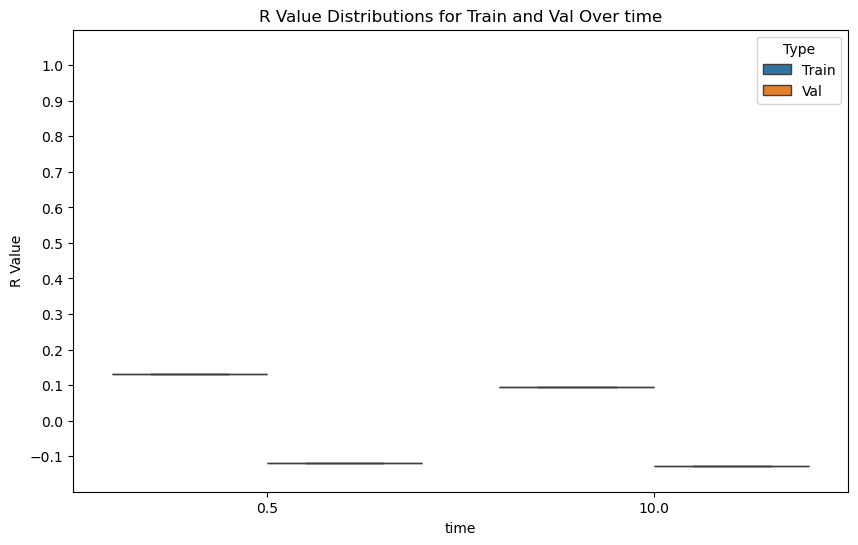

nan_df
          0.5      10.0  peptide          calc_name  ResStr  ResEnd  \
0    0.600000  0.600000        6  train_LXRa_test_1     NaN     NaN   
1    0.454080  0.590820        7  train_LXRa_test_1     NaN     NaN   
2    0.545070  0.659020        8  train_LXRa_test_1     NaN     NaN   
3    0.443390  0.515470        9  train_LXRa_test_1     NaN     NaN   
4    0.000000  0.000000       10  train_LXRa_test_1     NaN     NaN   
5    0.000000  0.000000       11  train_LXRa_test_1     NaN     NaN   
6    0.000000  0.000000       12  train_LXRa_test_1     NaN     NaN   
7    0.666650  0.666670       26  train_LXRa_test_1     NaN     NaN   
8    0.415510  0.560240       27  train_LXRa_test_1     NaN     NaN   
9    0.439650  0.543030       28  train_LXRa_test_1     NaN     NaN   
10   0.422850  0.483430       29  train_LXRa_test_1     NaN     NaN   
11   0.512930  0.633530       30  train_LXRa_test_1     NaN     NaN   
12   0.599990  0.600000       31  train_LXRa_test_1     NaN     NaN   

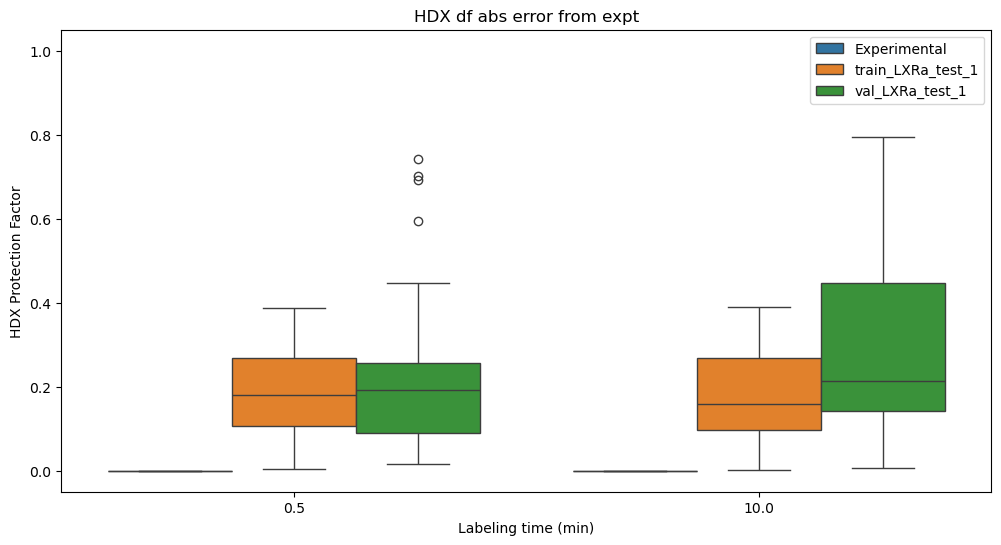

plot_dfracs_compare_MSE
          0.5      10.0  peptide          calc_name  ResStr  ResEnd  \
0    0.600000  0.600000        6  train_LXRa_test_1     NaN     NaN   
1    0.454080  0.590820        7  train_LXRa_test_1     NaN     NaN   
2    0.545070  0.659020        8  train_LXRa_test_1     NaN     NaN   
3    0.443390  0.515470        9  train_LXRa_test_1     NaN     NaN   
4    0.000000  0.000000       10  train_LXRa_test_1     NaN     NaN   
5    0.000000  0.000000       11  train_LXRa_test_1     NaN     NaN   
6    0.000000  0.000000       12  train_LXRa_test_1     NaN     NaN   
7    0.666650  0.666670       26  train_LXRa_test_1     NaN     NaN   
8    0.415510  0.560240       27  train_LXRa_test_1     NaN     NaN   
9    0.439650  0.543030       28  train_LXRa_test_1     NaN     NaN   
10   0.422850  0.483430       29  train_LXRa_test_1     NaN     NaN   
11   0.512930  0.633530       30  train_LXRa_test_1     NaN     NaN   
12   0.599990  0.600000       31  train_LXRa_test_1  

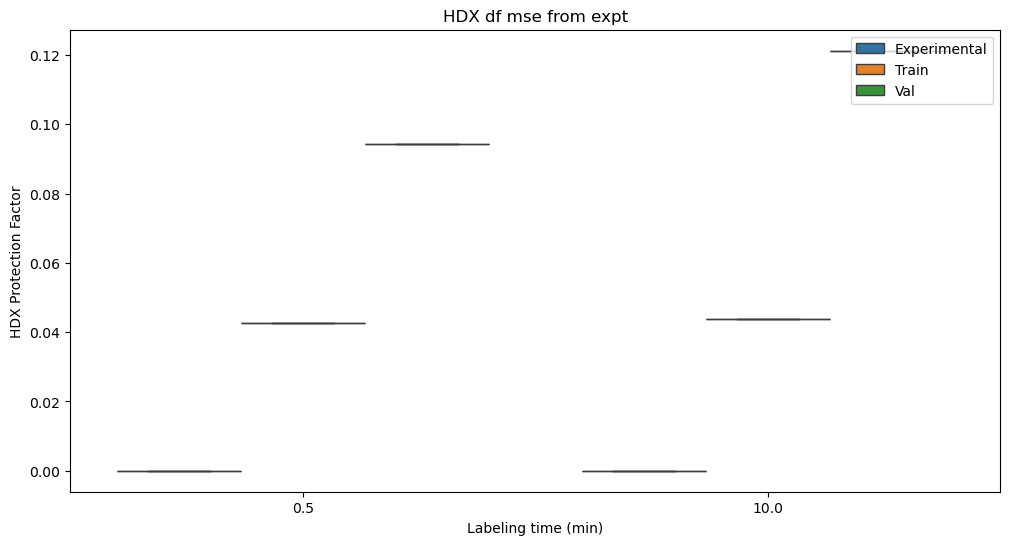

Saving experiment to:  logs/AvsB_S12_1708625597.pkl


/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:929: UserWarning: Reader has no dt information, set to 1.0 ps
  pickle.dump(self, f)


Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
Experiment name LvsX_SR already exists. Attempting to change name to LvsX_SR0
Preparing HDX data for Experimental
Path /home/alexi/Documents/ValDX/raw_data/LXRalpha/LXRalpha_APO/LXRa_APO_5AVI.dat
AVG: ncol = 4, len(names) = 2
                                                 HDX  \
0  /home/alexi/Documents/ValDX/raw_data/LXRalpha/...   
1                                                NaN   

                                                 SEG     calc_name  \
0  /home/alexi/Documents/ValDX/raw_data/LXRalpha/...  Experimental   
1                                                NaN     LXRa_test   

  experimental                                                top  \
0        False                                                NaN   
1          NaN  /home/alexi/Documents/ValDX/raw_data/raw_pdbs/...   

                                                traj  
0                                                NaN  
1  [/h

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:733: SettingW

Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
python /home/alexi/Documents/HDXer/HDXer/calc_hdx.py -t /home/alexi/Documents/ValDX/raw_data/raw_pdbs/clean_pdbs/5AVI_chain_A_fixed_small.xtc -p /home/alexi/Documents/ValDX/raw_data/raw_pdbs/clean_pdbs/5AVI_chain_A_fixed.pdb -m BestVendruscolo -log /home/alexi/Documents/ValDX/data/LvsX_SR0/train_LXRa_test_1/calc_hdx_train_LXRa_test_1.log -out /home/alexi/Documents/ValDX/data/LvsX_SR0/train_LXRa_test_1/out__train_LXRa_test_1 -seg /home/alexi/Documents/ValDX/data/LvsX_SR0/train_LXRa_test_1/train_residue_segs__LXRa_test_.txt -mopt "{ 'save_detailed' : True }" --times 0.5 10.0 -str 1
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
Residue predictions complete


/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaco

Path /home/alexi/Documents/ValDX/data/LvsX_SR0/train_LXRa_test_1/out__train_LXRa_test_1Segment_average_fractions.dat
AVG: ncol = 4, len(names) = 2
Experimental LXRa_test True 1
/home/alexi/Documents/ValDX/data/LvsX_SR0/train_LXRa_test_1/train_LXRa_test_1_expt_dfracs.dat
/home/alexi/Documents/ValDX/data/LvsX_SR0/train_LXRa_test_1
/home/alexi/Documents/ValDX/data/LvsX_SR0/train_LXRa_test_1/out__train_LXRa_test_1Intrinsic_rates.dat
REWIGHTING train_LXRa_test_1 with Exponent: 0
[{'do_reweight': False, 'do_params': True, 'stepfactor': 0.001, 'basegamma': 1, 'predictHDX_dir': ['/home/alexi/Documents/ValDX/data/LvsX_SR0/train_LXRa_test_1'], 'kint_file': '/home/alexi/Documents/ValDX/data/LvsX_SR0/train_LXRa_test_1/out__train_LXRa_test_1Intrinsic_rates.dat', 'exp_file': '/home/alexi/Documents/ValDX/data/LvsX_SR0/train_LXRa_test_1/train_LXRa_test_1_expt_dfracs.dat', 'times': [0.5, 10.0], 'restart_interval': 100, 'out_prefix': '/home/alexi/Documents/ValDX/data/LvsX_SR0/train_LXRa_test_1/reweighti

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

Recalculating no_weight_LXRa_test_1
    ResStr  ResEnd  peptide
0        6      11        0
1       10      25        1
2       12      21        2
3       12      25        3
4       13      25        4
5       14      25        5
6       26      32        6
7       26      40        7
8       26      43        8
9       41      49        9
10      53      58       10
11      53      59       11
12      59      63       12
13      63      70       13
14      64      70       14
15      71      78       15
16      74      81       16
17      74      82       17
18      82      86       18
19      82      88       19
20      87      91       20
21      91     103       21
22      92     103       22
23      92     104       23
24      92     106       24
25      95     103       25
26     104     108       26
27     111     116       27
28     111     118       28
29     111     123       29
30     112     118       30
31     113     118       31
32     117     123       32
33     119  

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))


Recalculating val_LXRa_test_1
    ResStr  ResEnd  peptide                                               path
0       53      58       10  /home/alexi/Documents/ValDX/data/LvsX_SR0/val_...
1       53      59       11  /home/alexi/Documents/ValDX/data/LvsX_SR0/val_...
2       59      63       12  /home/alexi/Documents/ValDX/data/LvsX_SR0/val_...
3       63      70       13  /home/alexi/Documents/ValDX/data/LvsX_SR0/val_...
4       64      70       14  /home/alexi/Documents/ValDX/data/LvsX_SR0/val_...
5       82      86       18  /home/alexi/Documents/ValDX/data/LvsX_SR0/val_...
6       82      88       19  /home/alexi/Documents/ValDX/data/LvsX_SR0/val_...
7       87      91       20  /home/alexi/Documents/ValDX/data/LvsX_SR0/val_...
8       91     103       21  /home/alexi/Documents/ValDX/data/LvsX_SR0/val_...
9       92     103       22  /home/alexi/Documents/ValDX/data/LvsX_SR0/val_...
10      92     104       23  /home/alexi/Documents/ValDX/data/LvsX_SR0/val_...
11      92     106    

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))


LogPf_by_res shape
(81,)
[18.84466874 18.84466874 20.63879522 22.43292171 21.53585846 19.74173198
 23.32998495 18.84466874 21.53585846 21.53585846 19.74173198 19.74173198
 18.85100939 19.74173198 17.05054225 17.9476055  21.54219912 17.9476055
 22.43292171 34.09474385 21.53585846 18.84466874 26.91823792 24.22704819
 17.05054225 10.7647589  22.43292171 25.11777078 23.32364429 20.63245457
 27.81530116 22.43292171 20.63879522 25.12411143 26.02117467 18.84466874
 22.43292171 21.53585846 13.46228929  5.38237945  1.79412648  1.79412648
  0.89706324 11.66182215 22.42658105 22.43292171 25.12411143 22.43292171
 20.63879522 17.94126484 23.32998495 18.84466874 22.43292171 26.91823792
 17.9476055   9.87403632 12.55888539 10.7647589   9.86769566 20.63245457
 19.74173198 14.35935253 17.0442016  18.83832808 13.45594863 13.45594863
 23.32364429 19.73539133 13.45594863 17.05054225 26.91823792 16.15347901
 20.63879522 25.12411143 19.74173198  6.27944269 11.66182215 20.63245457
 31.40355413 17.05054225 15

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))


LogPf_by_res shape
(197,)
[ 3.58825297 15.25641577 17.9476055  17.9476055  15.25641577 19.74173198
 18.84466874 14.35935253 20.63879522 28.7123644  13.46228929 17.05054225
 18.84466874 10.7647589   7.17650594  0.89706324  0.89706324  0.
  0.          0.          3.58825297  0.          0.          3.58825297
  3.58825297  2.69118973  6.27944269  5.38237945 14.35301187 22.42658105
 22.42658105 17.0442016   2.69118973 10.7647589  11.66182215  8.97063242
 16.14713836 29.60308699 20.63879522 19.74173198 18.84466874 18.84466874
 20.63879522 22.43292171 21.53585846 19.74173198 23.32998495 18.84466874
 21.53585846 21.53585846 19.74173198 19.74173198 18.85100939 19.74173198
 17.05054225 17.9476055  21.54219912 17.9476055  14.35301187 17.05054225
  8.97063242  4.48531621  7.17650594  9.86769566 15.25007512 39.47078265
 16.14713836 10.7647589  22.43292171 34.09474385 21.53585846 18.84466874
 26.91823792 24.22704819 17.05054225 10.7647589  22.43292171 25.11777078
 23.32364429 20.63245457 27.81530

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/core/universe.py:817: DeprecationWarning: The bfactor topology attribute is only provided as an alias to the tempfactor attribute. It will be removed in 3.0. Please use the tempfactor attribute instead.
  warnings.warn(BFACTOR_WARNING, DeprecationWarning)
/home/alexi/anaconda3/envs/HDX

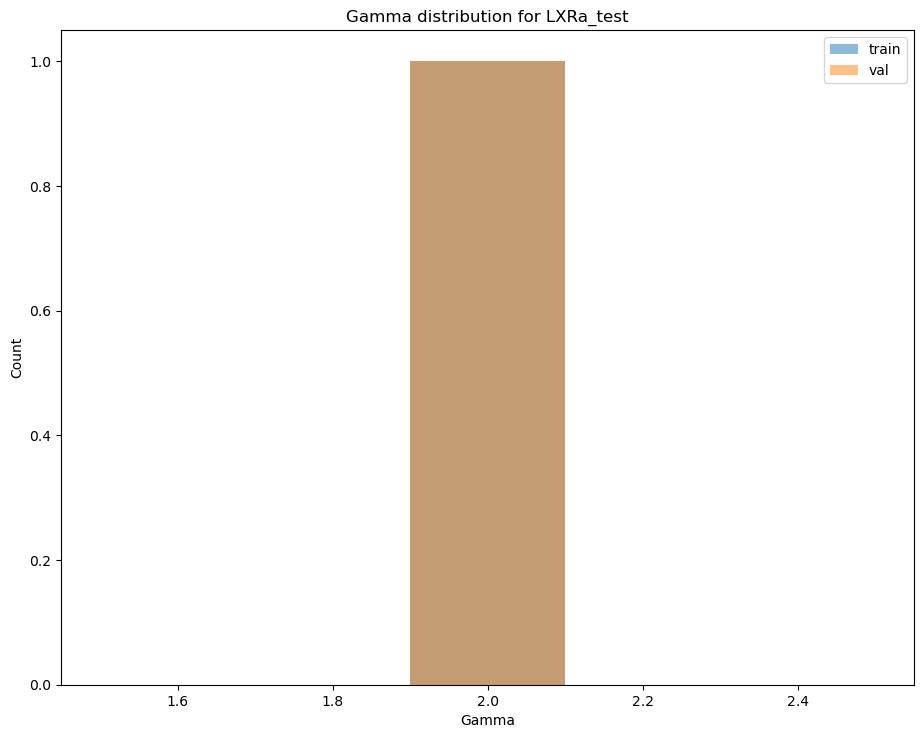

['train_LXRa_test_1']
['val_LXRa_test_1']
plot_dfracs_compare
              0.5          10.0  peptide          calc_name  ResStr  ResEnd  \
0    4.202800e-01  4.391700e-01        0       Experimental     NaN     NaN   
1    4.446700e-01  5.417800e-01        1       Experimental     NaN     NaN   
2    5.156400e-01  5.493600e-01        2       Experimental     NaN     NaN   
3    3.973800e-01  4.911800e-01        3       Experimental     NaN     NaN   
4    3.203500e-01  3.375100e-01        4       Experimental     NaN     NaN   
5    2.872600e-01  3.042700e-01        5       Experimental     NaN     NaN   
6    2.895300e-01  3.015700e-01        6       Experimental     NaN     NaN   
7    2.904600e-01  3.088100e-01        7       Experimental     NaN     NaN   
8    3.131100e-01  3.291500e-01        8       Experimental     NaN     NaN   
9    3.942200e-01  4.188200e-01        9       Experimental     NaN     NaN   
10   2.315300e-01  2.550800e-01       10       Experimental     NaN  

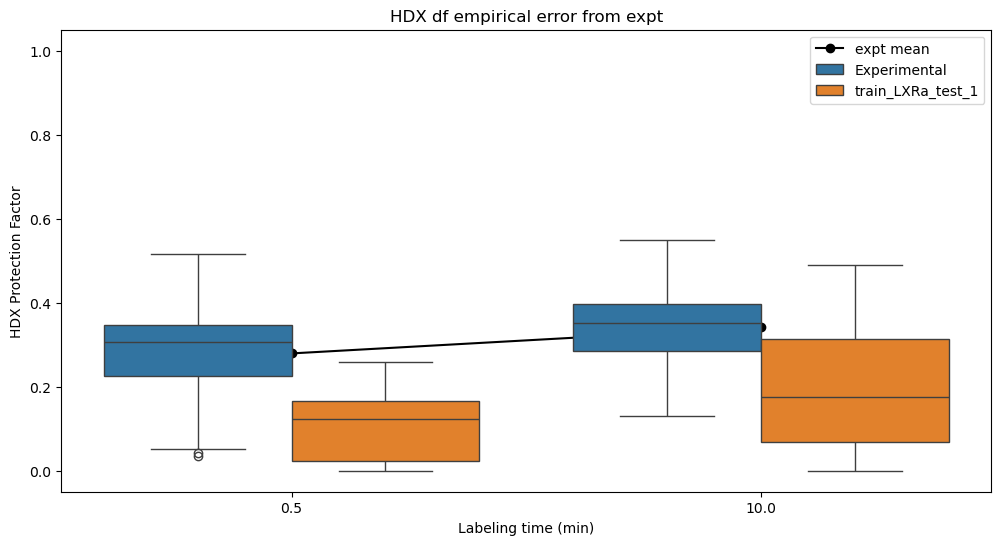

plot_dfracs_compare
              0.5          10.0  peptide          calc_name  ResStr  ResEnd  \
0    4.202800e-01  4.391700e-01        0       Experimental     NaN     NaN   
1    4.446700e-01  5.417800e-01        1       Experimental     NaN     NaN   
2    5.156400e-01  5.493600e-01        2       Experimental     NaN     NaN   
3    3.973800e-01  4.911800e-01        3       Experimental     NaN     NaN   
4    3.203500e-01  3.375100e-01        4       Experimental     NaN     NaN   
5    2.872600e-01  3.042700e-01        5       Experimental     NaN     NaN   
6    2.895300e-01  3.015700e-01        6       Experimental     NaN     NaN   
7    2.904600e-01  3.088100e-01        7       Experimental     NaN     NaN   
8    3.131100e-01  3.291500e-01        8       Experimental     NaN     NaN   
9    3.942200e-01  4.188200e-01        9       Experimental     NaN     NaN   
10   2.315300e-01  2.550800e-01       10       Experimental     NaN     NaN   
11   2.289100e-01  2.688400e-01 

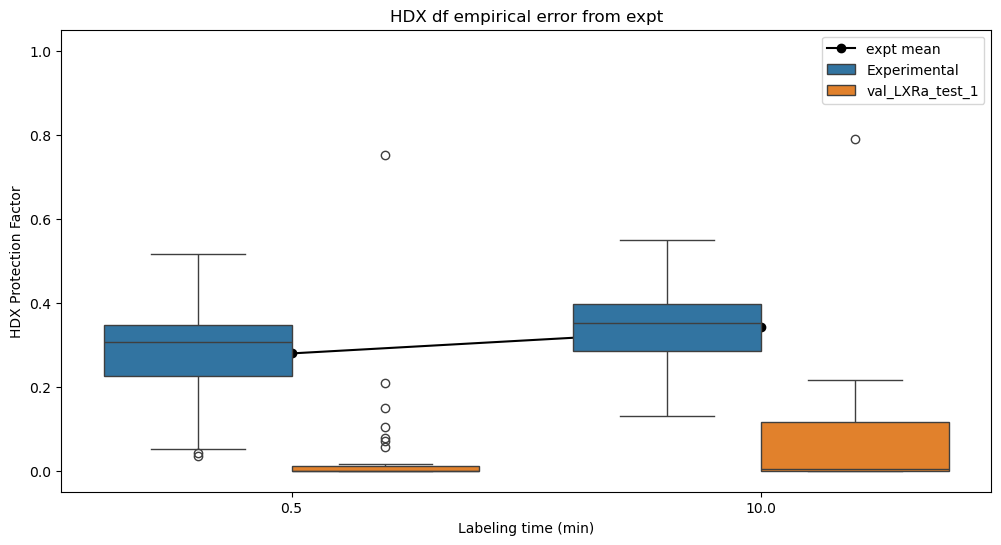

Restoring trainval peptide numbers
train_rep_names ['train_LXRa_test_1']
val_rep_names ['val_LXRa_test_1']
test_rep_names ['test_LXRa_test_1']
train_rep_peptides [0, 9, 15, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]
val_rep_peptides [10, 11, 12, 13, 14, 18, 19, 20, 21, 22, 23, 24, 25, 26, 37, 38, 39, 40, 41, 42, 43, 44, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 81, 82, 83]
test_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83]
manual merge df
             0.5      10.0  peptide          calc_name  ResStr  ResEnd  \
0   7.000000e-05  0.001390        0  train_LXRa_test_1     NaN     NaN   
1   1.441700e-01  0.335450        9  train_LXRa_test_1     NaN     NaN   
2   1.997200e-01  0.482900       15  train

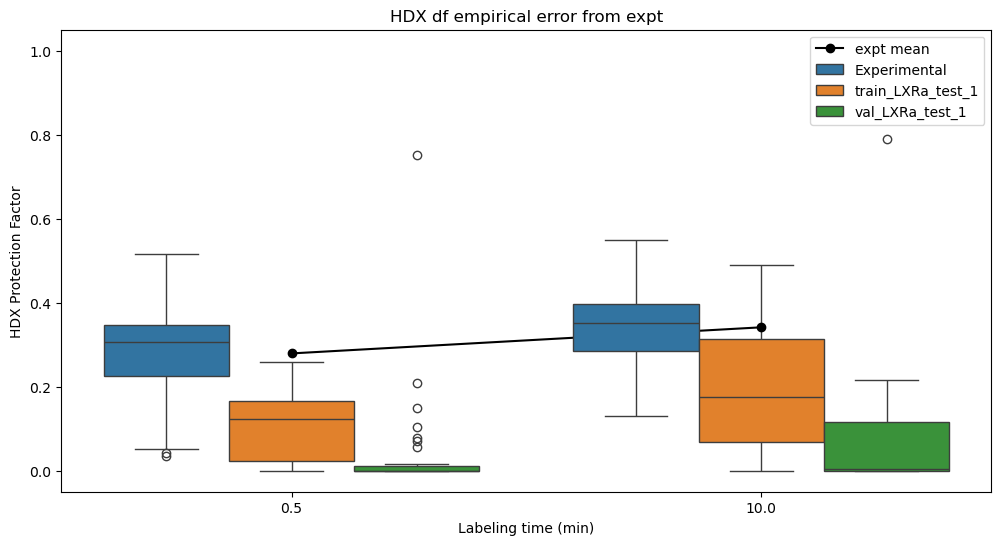

plotting paired errors
              0.5      10.0  peptide          calc_name  ResStr  ResEnd  \
0    4.202800e-01  0.439170        0       Experimental     NaN     NaN   
1    4.446700e-01  0.541780        1       Experimental     NaN     NaN   
2    5.156400e-01  0.549360        2       Experimental     NaN     NaN   
3    3.973800e-01  0.491180        3       Experimental     NaN     NaN   
4    3.203500e-01  0.337510        4       Experimental     NaN     NaN   
5    2.872600e-01  0.304270        5       Experimental     NaN     NaN   
6    2.895300e-01  0.301570        6       Experimental     NaN     NaN   
7    2.904600e-01  0.308810        7       Experimental     NaN     NaN   
8    3.131100e-01  0.329150        8       Experimental     NaN     NaN   
9    3.942200e-01  0.418820        9       Experimental     NaN     NaN   
10   2.315300e-01  0.255080       10       Experimental     NaN     NaN   
11   2.289100e-01  0.268840       11       Experimental     NaN     NaN   
12

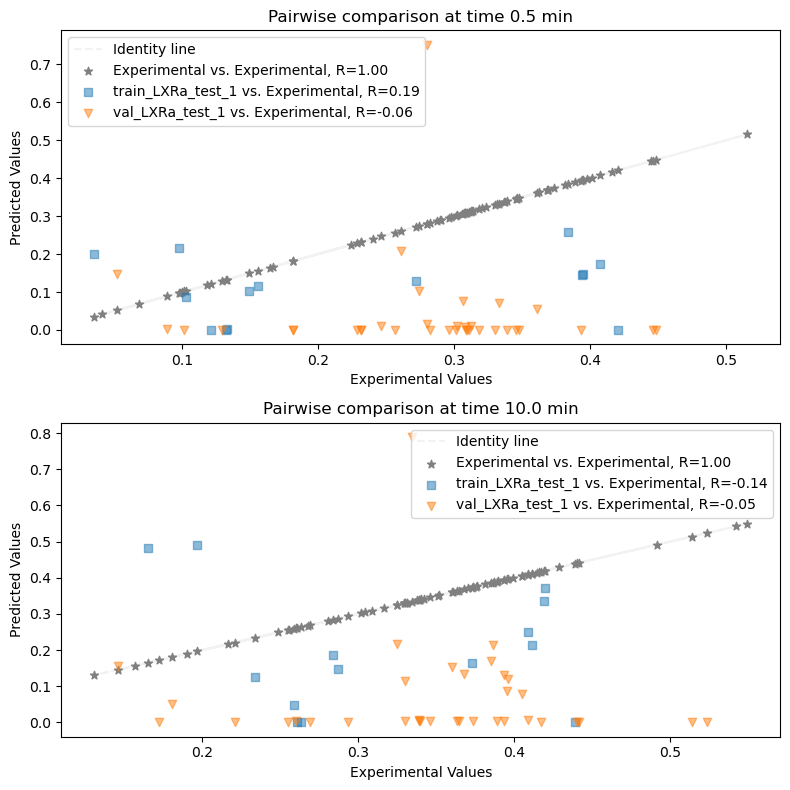

plotting paired trainval agreement
              0.5      10.0  peptide          calc_name  ResStr  ResEnd  \
0    4.202800e-01  0.439170        0       Experimental     NaN     NaN   
1    4.446700e-01  0.541780        1       Experimental     NaN     NaN   
2    5.156400e-01  0.549360        2       Experimental     NaN     NaN   
3    3.973800e-01  0.491180        3       Experimental     NaN     NaN   
4    3.203500e-01  0.337510        4       Experimental     NaN     NaN   
5    2.872600e-01  0.304270        5       Experimental     NaN     NaN   
6    2.895300e-01  0.301570        6       Experimental     NaN     NaN   
7    2.904600e-01  0.308810        7       Experimental     NaN     NaN   
8    3.131100e-01  0.329150        8       Experimental     NaN     NaN   
9    3.942200e-01  0.418820        9       Experimental     NaN     NaN   
10   2.315300e-01  0.255080       10       Experimental     NaN     NaN   
11   2.289100e-01  0.268840       11       Experimental     NaN  

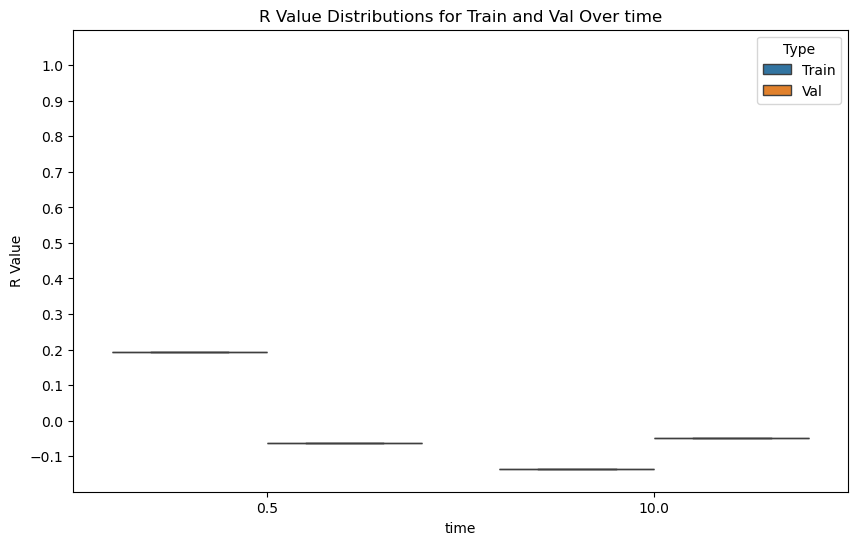

nan_df
             0.5      10.0  peptide          calc_name  ResStr  ResEnd  \
0   7.000000e-05  0.001390        0  train_LXRa_test_1     NaN     NaN   
1   1.441700e-01  0.335450        9  train_LXRa_test_1     NaN     NaN   
2   1.997200e-01  0.482900       15  train_LXRa_test_1     NaN     NaN   
3   1.733500e-01  0.250440       51  train_LXRa_test_1     NaN     NaN   
4   2.582900e-01  0.372910       52  train_LXRa_test_1     NaN     NaN   
5   1.475900e-01  0.213090       53  train_LXRa_test_1     NaN     NaN   
6   1.291400e-01  0.186450       54  train_LXRa_test_1     NaN     NaN   
7   1.147900e-01  0.165740       55  train_LXRa_test_1     NaN     NaN   
8   1.033100e-01  0.149160       56  train_LXRa_test_1     NaN     NaN   
9   8.610000e-02  0.124420       57  train_LXRa_test_1     NaN     NaN   
10  3.320000e-03  0.049270       58  train_LXRa_test_1     NaN     NaN   
11  1.000000e-05  0.000210       59  train_LXRa_test_1     NaN     NaN   
12  2.000000e-05  0.000370     

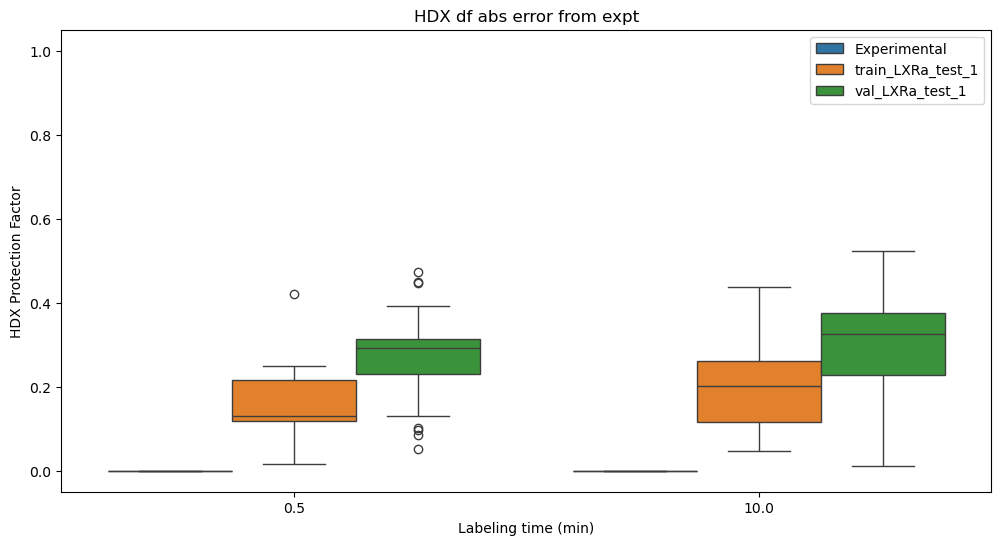

plot_dfracs_compare_MSE
              0.5      10.0  peptide          calc_name  ResStr  ResEnd  \
0    7.000000e-05  0.001390        0  train_LXRa_test_1     NaN     NaN   
1    1.441700e-01  0.335450        9  train_LXRa_test_1     NaN     NaN   
2    1.997200e-01  0.482900       15  train_LXRa_test_1     NaN     NaN   
3    1.733500e-01  0.250440       51  train_LXRa_test_1     NaN     NaN   
4    2.582900e-01  0.372910       52  train_LXRa_test_1     NaN     NaN   
5    1.475900e-01  0.213090       53  train_LXRa_test_1     NaN     NaN   
6    1.291400e-01  0.186450       54  train_LXRa_test_1     NaN     NaN   
7    1.147900e-01  0.165740       55  train_LXRa_test_1     NaN     NaN   
8    1.033100e-01  0.149160       56  train_LXRa_test_1     NaN     NaN   
9    8.610000e-02  0.124420       57  train_LXRa_test_1     NaN     NaN   
10   3.320000e-03  0.049270       58  train_LXRa_test_1     NaN     NaN   
11   1.000000e-05  0.000210       59  train_LXRa_test_1     NaN     NaN   
1

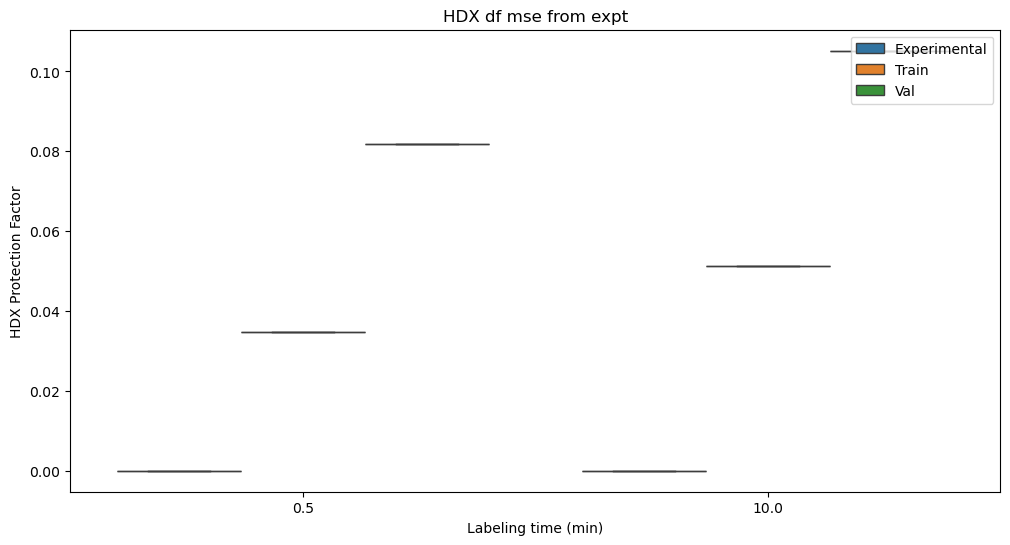

Saving experiment to:  logs/LvsX_SR0_1708625607.pkl


/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:929: UserWarning: Reader has no dt information, set to 1.0 ps
  pickle.dump(self, f)


Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
Experiment name mixAandB_Sp already exists. Attempting to change name to mixAandB_Sp0
Preparing HDX data for Experimental
Path /home/alexi/Documents/ValDX/raw_data/LXRalpha/LXRalpha_APO/LXRa_APO_5AVI.dat
AVG: ncol = 4, len(names) = 2
                                                 HDX  \
0  /home/alexi/Documents/ValDX/raw_data/LXRalpha/...   
1                                                NaN   

                                                 SEG     calc_name  \
0  /home/alexi/Documents/ValDX/raw_data/LXRalpha/...  Experimental   
1                                                NaN     LXRa_test   

  experimental                                                top  \
0        False                                                NaN   
1          NaN  /home/alexi/Documents/ValDX/raw_data/raw_pdbs/...   

                                                traj  
0                                                NaN 

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:733: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_segs["cal

Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
python /home/alexi/Documents/HDXer/HDXer/calc_hdx.py -t /home/alexi/Documents/ValDX/raw_data/raw_pdbs/clean_pdbs/5AVI_chain_A_fixed_small.xtc -p /home/alexi/Documents/ValDX/raw_data/raw_pdbs/clean_pdbs/5AVI_chain_A_fixed.pdb -m BestVendruscolo -log /home/alexi/Documents/ValDX/data/mixAandB_Sp0/train_LXRa_test_1/calc_hdx_train_LXRa_test_1.log -out /home/alexi/Documents/ValDX/data/mixAandB_Sp0/train_LXRa_test_1/out__train_LXRa_test_1 -seg /home/alexi/Documents/ValDX/data/mixAandB_Sp0/train_LXRa_test_1/train_residue_segs__LXRa_test_.txt -mopt "{ 'save_detailed' : True }" --times 0.5 10.0 -str 1
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
Residue predictions complete


/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaco

Path /home/alexi/Documents/ValDX/data/mixAandB_Sp0/train_LXRa_test_1/out__train_LXRa_test_1Segment_average_fractions.dat
AVG: ncol = 4, len(names) = 2
Experimental LXRa_test True 1
/home/alexi/Documents/ValDX/data/mixAandB_Sp0/train_LXRa_test_1/train_LXRa_test_1_expt_dfracs.dat
/home/alexi/Documents/ValDX/data/mixAandB_Sp0/train_LXRa_test_1
/home/alexi/Documents/ValDX/data/mixAandB_Sp0/train_LXRa_test_1/out__train_LXRa_test_1Intrinsic_rates.dat
REWIGHTING train_LXRa_test_1 with Exponent: 0
[{'do_reweight': False, 'do_params': True, 'stepfactor': 0.001, 'basegamma': 1, 'predictHDX_dir': ['/home/alexi/Documents/ValDX/data/mixAandB_Sp0/train_LXRa_test_1'], 'kint_file': '/home/alexi/Documents/ValDX/data/mixAandB_Sp0/train_LXRa_test_1/out__train_LXRa_test_1Intrinsic_rates.dat', 'exp_file': '/home/alexi/Documents/ValDX/data/mixAandB_Sp0/train_LXRa_test_1/train_LXRa_test_1_expt_dfracs.dat', 'times': [0.5, 10.0], 'restart_interval': 100, 'out_prefix': '/home/alexi/Documents/ValDX/data/mixAandB

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

Recalculating no_weight_LXRa_test_1
    ResStr  ResEnd  peptide
0        6      11        0
1       10      25        1
2       12      21        2
3       12      25        3
4       13      25        4
5       14      25        5
6       26      32        6
7       26      40        7
8       26      43        8
9       41      49        9
10      53      58       10
11      53      59       11
12      59      63       12
13      63      70       13
14      64      70       14
15      71      78       15
16      74      81       16
17      74      82       17
18      82      86       18
19      82      88       19
20      87      91       20
21      91     103       21
22      92     103       22
23      92     104       23
24      92     106       24
25      95     103       25
26     104     108       26
27     111     116       27
28     111     118       28
29     111     123       29
30     112     118       30
31     113     118       31
32     117     123       32
33     119  

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))


Recalculating val_LXRa_test_1
    ResStr  ResEnd  peptide                                               path
0        6      11        0  /home/alexi/Documents/ValDX/data/mixAandB_Sp0/...
1       71      78       15  /home/alexi/Documents/ValDX/data/mixAandB_Sp0/...
2       74      81       16  /home/alexi/Documents/ValDX/data/mixAandB_Sp0/...
3       74      82       17  /home/alexi/Documents/ValDX/data/mixAandB_Sp0/...
4       82      86       18  /home/alexi/Documents/ValDX/data/mixAandB_Sp0/...
5       82      88       19  /home/alexi/Documents/ValDX/data/mixAandB_Sp0/...
6       87      91       20  /home/alexi/Documents/ValDX/data/mixAandB_Sp0/...
7      158     168       47  /home/alexi/Documents/ValDX/data/mixAandB_Sp0/...
8      158     169       48  /home/alexi/Documents/ValDX/data/mixAandB_Sp0/...
9      158     170       49  /home/alexi/Documents/ValDX/data/mixAandB_Sp0/...
10     160     168       50  /home/alexi/Documents/ValDX/data/mixAandB_Sp0/...
11     163     172    

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))


LogPf_by_res shape
(76,)
[  1.28582313  59.44902296  60.4133903   60.4133903   59.44902296
  61.05630187   5.14329251  60.09193452   3.21455782   1.60727891
   2.57164625   3.5360136    5.46474829  14.1440544    5.78620407
   3.85746938  62.02066921  66.19959438  61.69921343  60.73484609
  63.62794812  62.66358078  60.09193452   3.85746938  62.02066921
   9.00076189  64.59231547  65.87813859  62.02066921  61.37775765
  63.30649234   9.32221767   9.96512923  12.53677549  11.89386392
   6.10765985   2.25019047   1.28582313  60.4133903    5.46474829
   3.21455782   8.35785033  13.17968705  64.27085969  62.98503656
  63.30649234 119.86241326  61.37775765   5.78620407   2.25019047
   2.89310204   1.92873469   7.0720272    5.14329251  59.77047874
   7.39348298  61.05630187  61.05630187  60.4133903   62.66358078
  62.66358078  61.05630187  61.69921343  65.87813859  62.34212499
   2.89310204  57.19883249   4.17892516   4.50038094   4.50038094
   2.25019047   4.17892516   7.39348298  65.2352270

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))


LogPf_by_res shape
(197,)
[  1.28582313  59.44902296  60.4133903   60.4133903   59.44902296
  61.05630187  60.73484609  59.12756718  61.37775765  64.27085969
  58.8061114   60.09193452  60.73484609   3.85746938   2.57164625
   0.32145578   0.32145578   0.           0.           0.
   1.28582313   0.           0.           1.28582313   1.28582313
   0.96436735   2.25019047   1.92873469   5.14329251   8.03639454
   8.03639454   6.10765985   0.96436735   3.85746938   4.17892516
   3.21455782   5.78620407  10.6080408   61.37775765  61.05630187
  60.73484609  60.73484609  61.37775765  62.02066921  61.69921343
  61.05630187  62.34212499  60.73484609  61.69921343  61.69921343
  61.05630187  61.05630187 114.71912076  61.05630187  60.09193452
  60.4133903  115.6834881   60.4133903    5.14329251  60.09193452
   3.21455782   1.60727891   2.57164625   3.5360136    5.46474829
  14.1440544    5.78620407   3.85746938  62.02066921  66.19959438
  61.69921343  60.73484609  63.62794812  62.66358078  60.0

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/core/universe.py:817: DeprecationWarning: The bfactor topology attribute is only provided as an alias to the tempfactor attribute. It will be removed in 3.0. Please use the tempfactor attribute instead.
  warnings.warn(BFACTOR_WARNING, DeprecationWarning)
/home/alexi/anaconda3/envs/HDX

Writing val PDB to results/mixAandB_Sp/val_1_mixAandB_Sp_20240222-181338.pdb


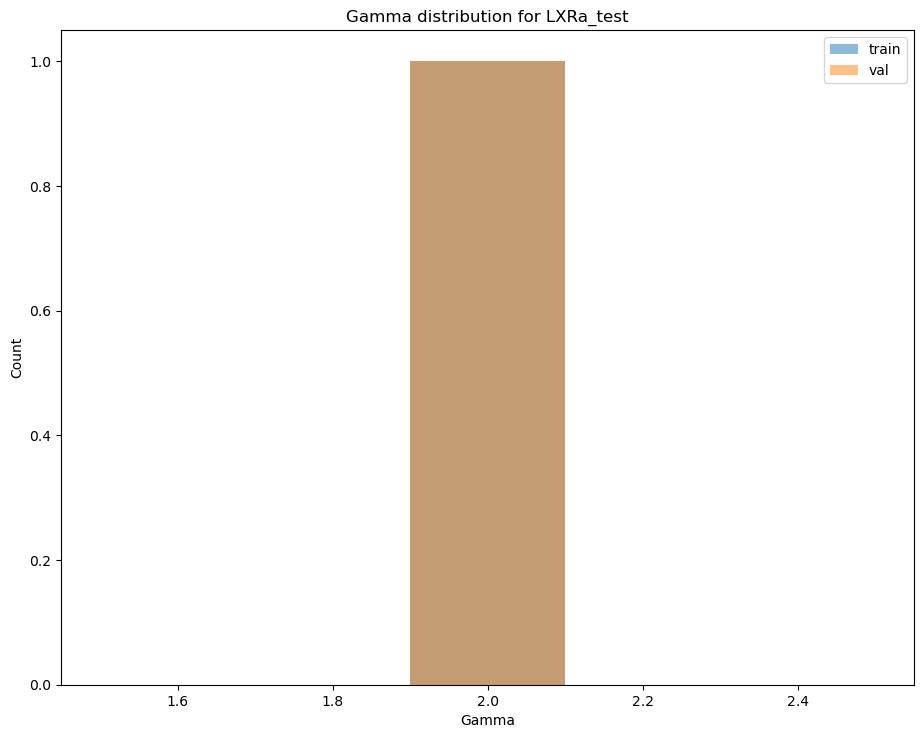

['train_LXRa_test_1']
['val_LXRa_test_1']
plot_dfracs_compare
          0.5      10.0  peptide          calc_name  ResStr  ResEnd  \
0    0.420280  0.439170        0       Experimental     NaN     NaN   
1    0.444670  0.541780        1       Experimental     NaN     NaN   
2    0.515640  0.549360        2       Experimental     NaN     NaN   
3    0.397380  0.491180        3       Experimental     NaN     NaN   
4    0.320350  0.337510        4       Experimental     NaN     NaN   
5    0.287260  0.304270        5       Experimental     NaN     NaN   
6    0.289530  0.301570        6       Experimental     NaN     NaN   
7    0.290460  0.308810        7       Experimental     NaN     NaN   
8    0.313110  0.329150        8       Experimental     NaN     NaN   
9    0.394220  0.418820        9       Experimental     NaN     NaN   
10   0.231530  0.255080       10       Experimental     NaN     NaN   
11   0.228910  0.268840       11       Experimental     NaN     NaN   
12   0.181440  

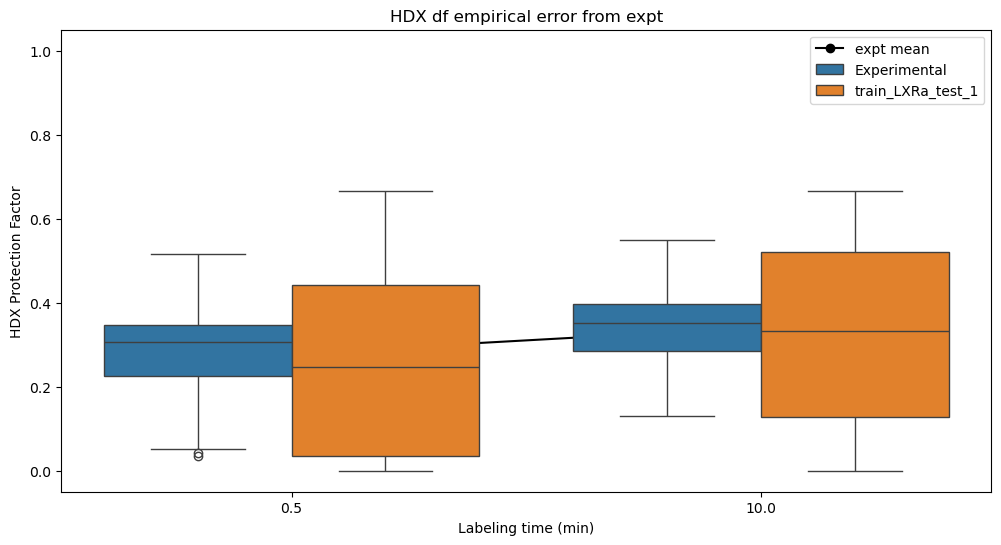

plot_dfracs_compare
          0.5      10.0  peptide          calc_name  ResStr  ResEnd  \
0    0.420280  0.439170        0       Experimental     NaN     NaN   
1    0.444670  0.541780        1       Experimental     NaN     NaN   
2    0.515640  0.549360        2       Experimental     NaN     NaN   
3    0.397380  0.491180        3       Experimental     NaN     NaN   
4    0.320350  0.337510        4       Experimental     NaN     NaN   
5    0.287260  0.304270        5       Experimental     NaN     NaN   
6    0.289530  0.301570        6       Experimental     NaN     NaN   
7    0.290460  0.308810        7       Experimental     NaN     NaN   
8    0.313110  0.329150        8       Experimental     NaN     NaN   
9    0.394220  0.418820        9       Experimental     NaN     NaN   
10   0.231530  0.255080       10       Experimental     NaN     NaN   
11   0.228910  0.268840       11       Experimental     NaN     NaN   
12   0.181440  0.220670       12       Experimental     N

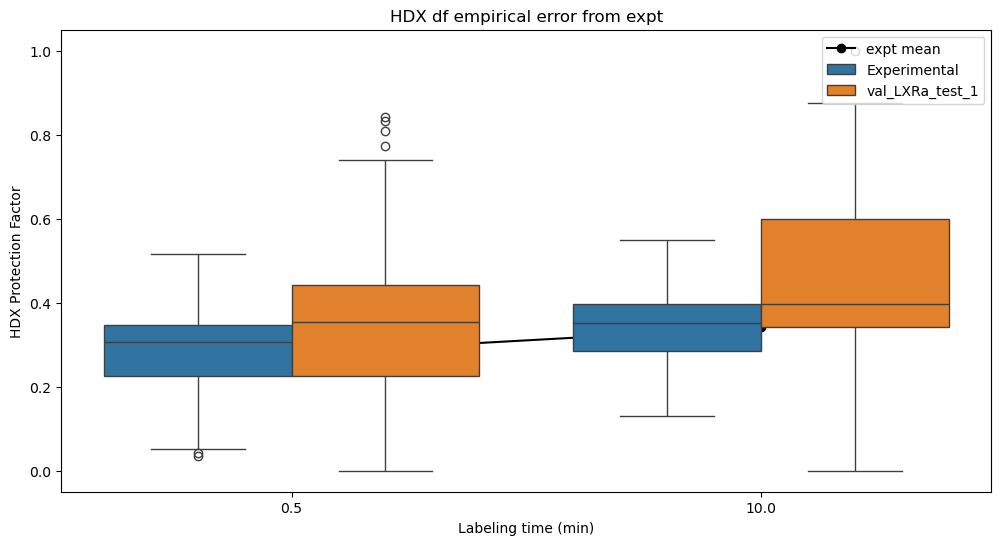

Restoring trainval peptide numbers
train_rep_names ['train_LXRa_test_1']
val_rep_names ['val_LXRa_test_1']
test_rep_names ['test_LXRa_test_1']
train_rep_peptides [6, 9, 10, 11, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]
val_rep_peptides [0, 15, 16, 17, 18, 19, 20, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83]
test_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83]
manual merge df
         0.5      10.0  peptide          calc_name  ResStr  ResEnd  \
0   0.600000  0.600000        6  train_LXRa_test_1     NaN     NaN   
1   0.470780  0.539220        9  train_LXRa_test_1     NaN     NaN   
2   0.00000

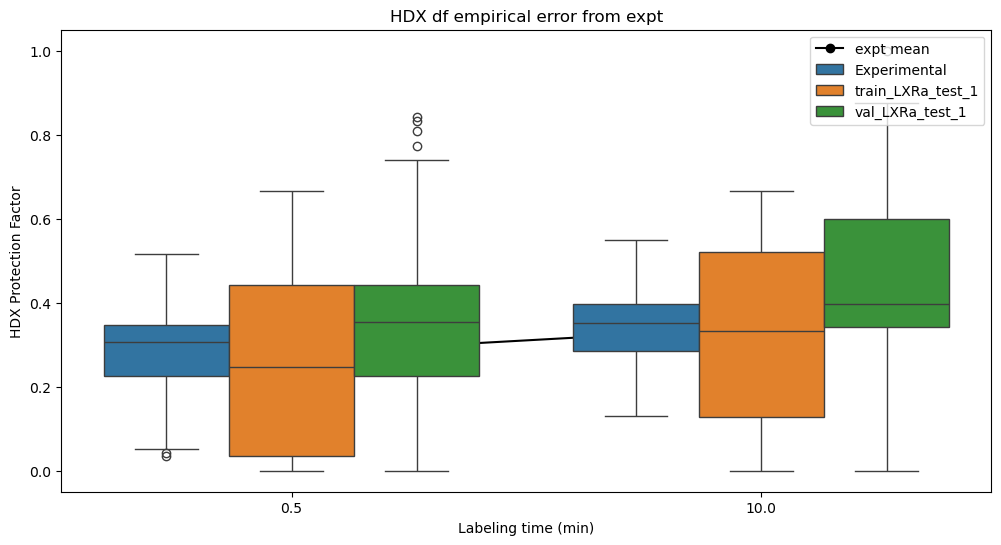

plotting paired errors
          0.5      10.0  peptide          calc_name  ResStr  ResEnd  \
0    0.420280  0.439170        0       Experimental     NaN     NaN   
1    0.444670  0.541780        1       Experimental     NaN     NaN   
2    0.515640  0.549360        2       Experimental     NaN     NaN   
3    0.397380  0.491180        3       Experimental     NaN     NaN   
4    0.320350  0.337510        4       Experimental     NaN     NaN   
5    0.287260  0.304270        5       Experimental     NaN     NaN   
6    0.289530  0.301570        6       Experimental     NaN     NaN   
7    0.290460  0.308810        7       Experimental     NaN     NaN   
8    0.313110  0.329150        8       Experimental     NaN     NaN   
9    0.394220  0.418820        9       Experimental     NaN     NaN   
10   0.231530  0.255080       10       Experimental     NaN     NaN   
11   0.228910  0.268840       11       Experimental     NaN     NaN   
12   0.181440  0.220670       12       Experimental   

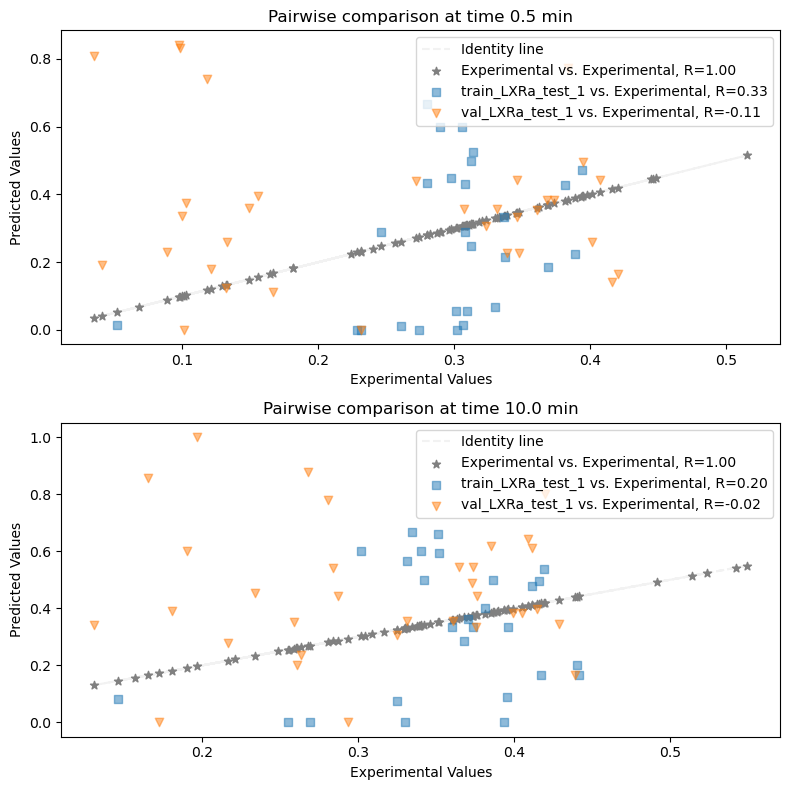

plotting paired trainval agreement
          0.5      10.0  peptide          calc_name  ResStr  ResEnd  \
0    0.420280  0.439170        0       Experimental     NaN     NaN   
1    0.444670  0.541780        1       Experimental     NaN     NaN   
2    0.515640  0.549360        2       Experimental     NaN     NaN   
3    0.397380  0.491180        3       Experimental     NaN     NaN   
4    0.320350  0.337510        4       Experimental     NaN     NaN   
5    0.287260  0.304270        5       Experimental     NaN     NaN   
6    0.289530  0.301570        6       Experimental     NaN     NaN   
7    0.290460  0.308810        7       Experimental     NaN     NaN   
8    0.313110  0.329150        8       Experimental     NaN     NaN   
9    0.394220  0.418820        9       Experimental     NaN     NaN   
10   0.231530  0.255080       10       Experimental     NaN     NaN   
11   0.228910  0.268840       11       Experimental     NaN     NaN   
12   0.181440  0.220670       12       Exp

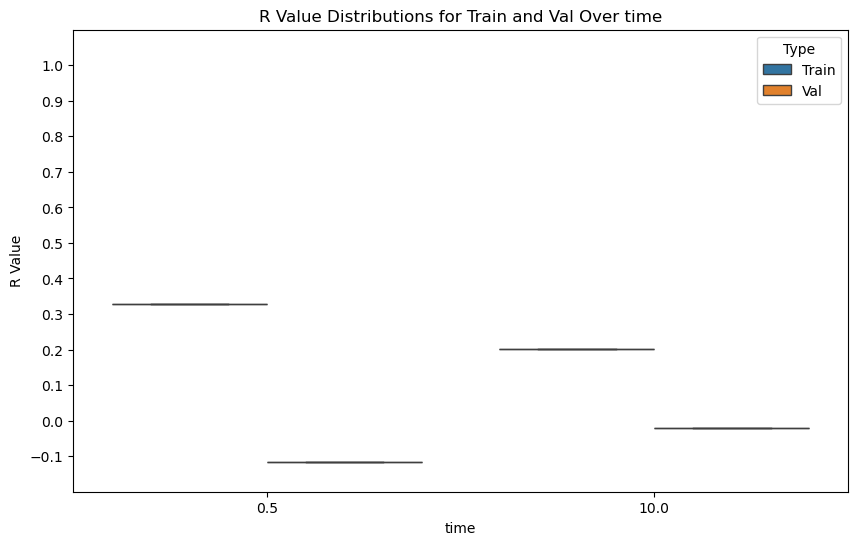

nan_df
          0.5      10.0  peptide          calc_name  ResStr  ResEnd  \
0    0.600000  0.600000        6  train_LXRa_test_1     NaN     NaN   
1    0.470780  0.539220        9  train_LXRa_test_1     NaN     NaN   
2    0.000000  0.000000       10  train_LXRa_test_1     NaN     NaN   
3    0.000000  0.000000       11  train_LXRa_test_1     NaN     NaN   
4    0.014840  0.088330       22  train_LXRa_test_1     NaN     NaN   
5    0.013600  0.080970       23  train_LXRa_test_1     NaN     NaN   
6    0.012550  0.074740       24  train_LXRa_test_1     NaN     NaN   
7    0.000000  0.000000       25  train_LXRa_test_1     NaN     NaN   
8    0.666670  0.666670       26  train_LXRa_test_1     NaN     NaN   
9    0.429970  0.592220       27  train_LXRa_test_1     NaN     NaN   
10   0.449980  0.565870       28  train_LXRa_test_1     NaN     NaN   
11   0.429140  0.496760       29  train_LXRa_test_1     NaN     NaN   
12   0.524970  0.660180       30  train_LXRa_test_1     NaN     NaN   

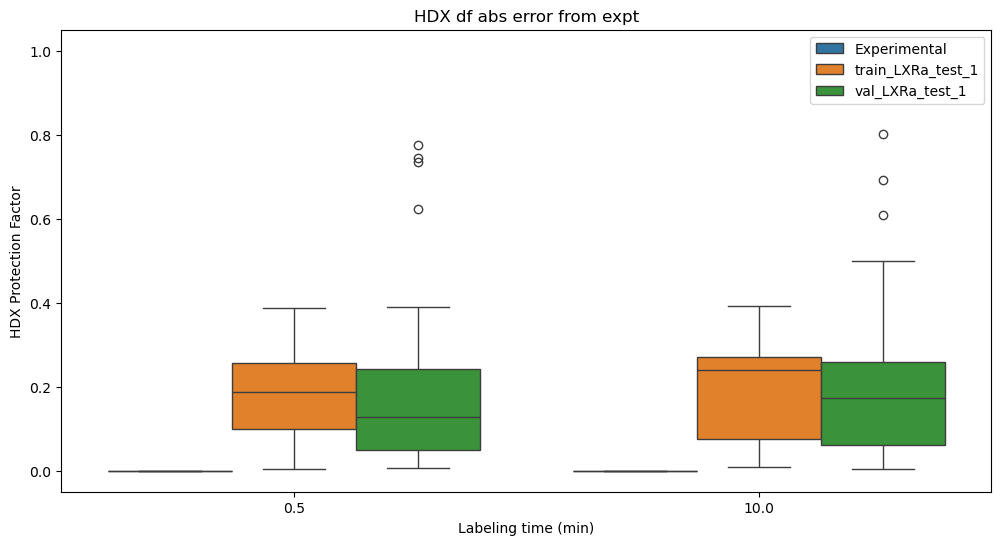

plot_dfracs_compare_MSE
          0.5      10.0  peptide          calc_name  ResStr  ResEnd  \
0    0.600000  0.600000        6  train_LXRa_test_1     NaN     NaN   
1    0.470780  0.539220        9  train_LXRa_test_1     NaN     NaN   
2    0.000000  0.000000       10  train_LXRa_test_1     NaN     NaN   
3    0.000000  0.000000       11  train_LXRa_test_1     NaN     NaN   
4    0.014840  0.088330       22  train_LXRa_test_1     NaN     NaN   
5    0.013600  0.080970       23  train_LXRa_test_1     NaN     NaN   
6    0.012550  0.074740       24  train_LXRa_test_1     NaN     NaN   
7    0.000000  0.000000       25  train_LXRa_test_1     NaN     NaN   
8    0.666670  0.666670       26  train_LXRa_test_1     NaN     NaN   
9    0.429970  0.592220       27  train_LXRa_test_1     NaN     NaN   
10   0.449980  0.565870       28  train_LXRa_test_1     NaN     NaN   
11   0.429140  0.496760       29  train_LXRa_test_1     NaN     NaN   
12   0.524970  0.660180       30  train_LXRa_test_1  

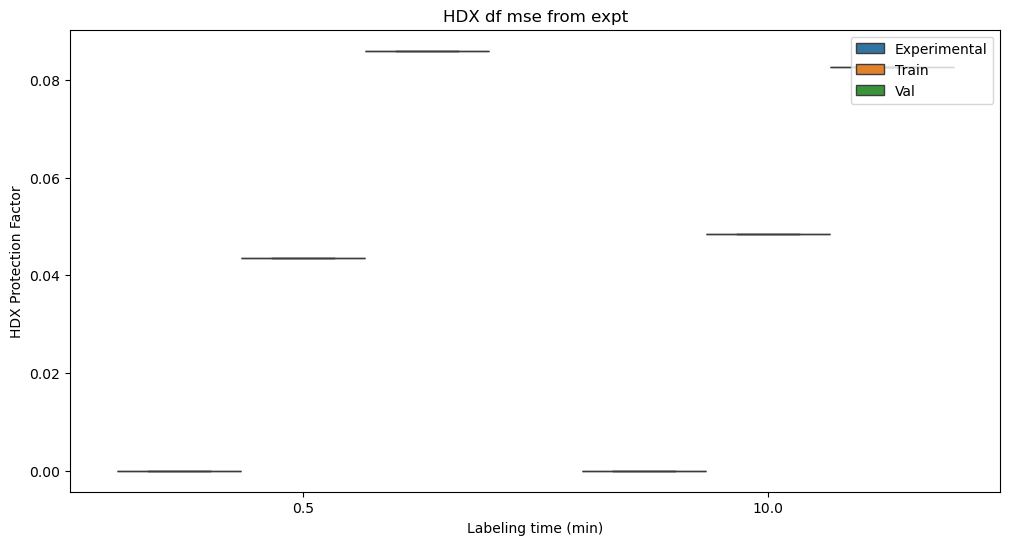

Saving experiment to:  logs/mixAandB_Sp0_1708625619.pkl


/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:929: UserWarning: Reader has no dt information, set to 1.0 ps
  pickle.dump(self, f)


In [30]:

splits = ['S', 'SR', 'Sp']
split_names = ['AvsB', 'LvsX', 'mixAandB']
system = 'BPTITtut_test'

raw_run_outputs = {}
analysis_dumps = {}
analysis_df = pd.DataFrame()
names = []
save_paths = []


for split, split_name in zip(splits, split_names):
    run_outputs, analysis_dump, df, name, save_path = run_split_test(split, split_name, system)
    raw_run_outputs[name] = run_outputs
    analysis_dumps.update(analysis_dump)
    analysis_df = pd.concat([analysis_df, df])
    names.append(name)
    save_paths.append(save_path)



/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


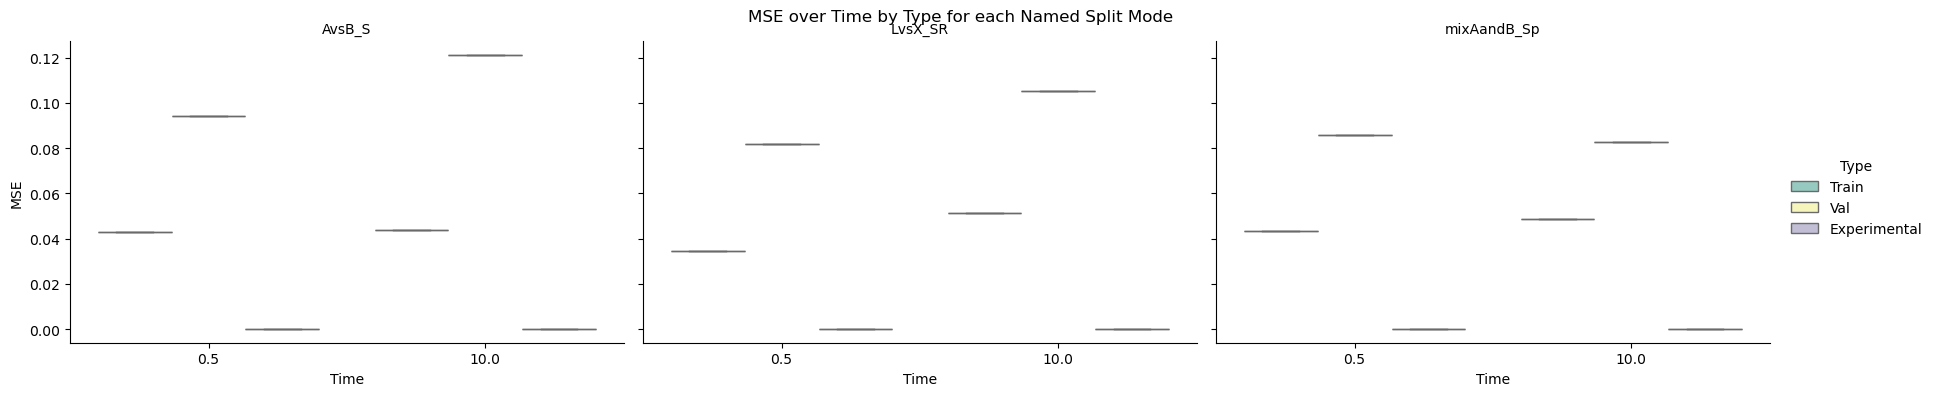

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Replace 'your_dataframe' with your actual DataFrame variable
df = analysis_df

# Create a FacetGrid, using 'name' for each subplot
g = sns.FacetGrid(df, col="name", col_wrap=3, height=4, aspect=1.5)
g.fig.suptitle('MSE over Time by Type for each Named Split Mode')

# Create boxplots
g = g.map(sns.boxplot, "time", "mse", "Type", palette="Set3")

# Adding some additional options for better visualization
g.add_legend(title='Type')
g.set_axis_labels("Time", "MSE")
g.set_titles("{col_name}")

# Adjust the arrangement of the plots
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()


/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


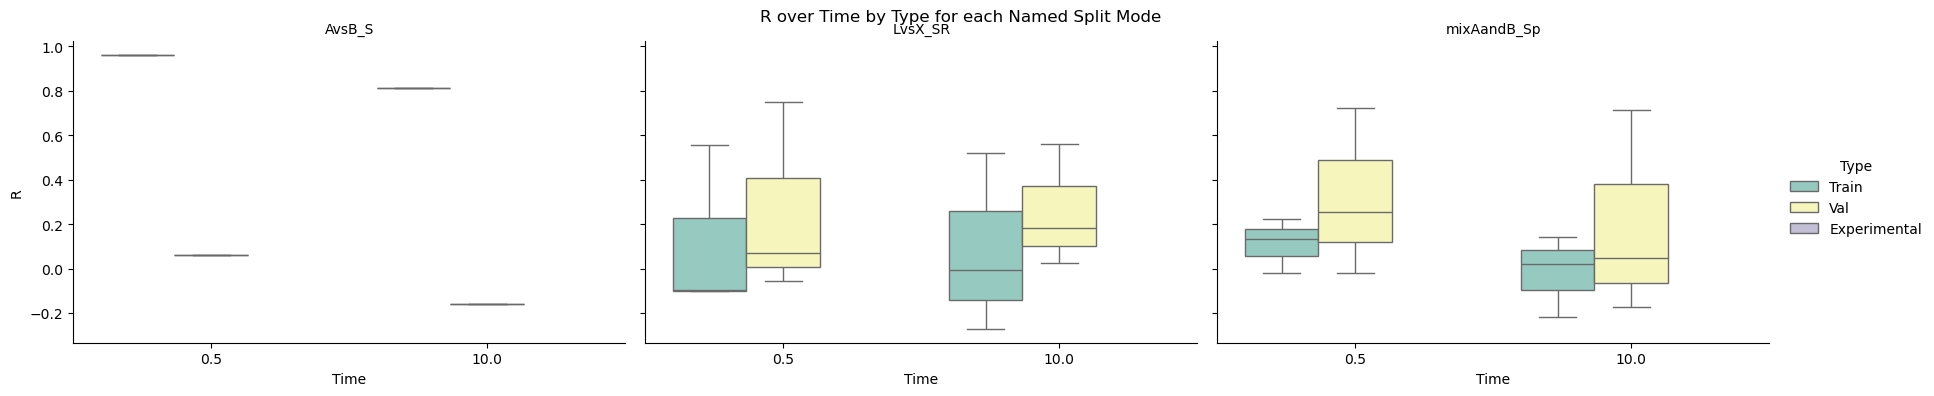

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Replace 'your_dataframe' with your actual DataFrame variable
df = analysis_df

# Create a FacetGrid, using 'name' for each subplot
g = sns.FacetGrid(df, col="name", col_wrap=3, height=4, aspect=1.5)
g.fig.suptitle('R over Time by Type for each Named Split Mode')

# Create boxplots
g = g.map(sns.boxplot, "time", "R", "Type", palette="Set3")

# Adding some additional options for better visualization
g.add_legend(title='Type')
g.set_axis_labels("Time", "R")
g.set_titles("{col_name}")

# Adjust the arrangement of the plots
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()


                                               LogPf              calc_name  \
0  [1.412742265380934, 0.0, 0.0, 1.41274226538093...      train_LXRa_test_1   
1  [1.4, 7.949999999999999, 9.0, 9.0, 7.949999999...  no_weight_LXRa_test_1   
2  [1.412742265380934, 69.65217870342408, 70.7117...        val_LXRa_test_1   
3  [1.412742265380934, 69.65217870342408, 70.7117...       test_LXRa_test_1   
0  [3.5882529682870614, 15.25641576984737, 17.947...      train_LXRa_test_1   
1  [1.4, 7.949999999999999, 9.0, 9.0, 7.949999999...  no_weight_LXRa_test_1   
2  [18.84466873813443, 18.84466873813443, 20.6387...        val_LXRa_test_1   
3  [3.5882529682870614, 15.25641576984737, 17.947...       test_LXRa_test_1   
0  [1.2858231269356477, 0.0, 0.0, 1.2858231269356...      train_LXRa_test_1   
1  [1.4, 7.949999999999999, 9.0, 9.0, 7.949999999...  no_weight_LXRa_test_1   
2  [1.2858231269356477, 59.449022959096126, 60.41...        val_LXRa_test_1   
3  [1.2858231269356477, 59.449022959096126, 60.41...

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

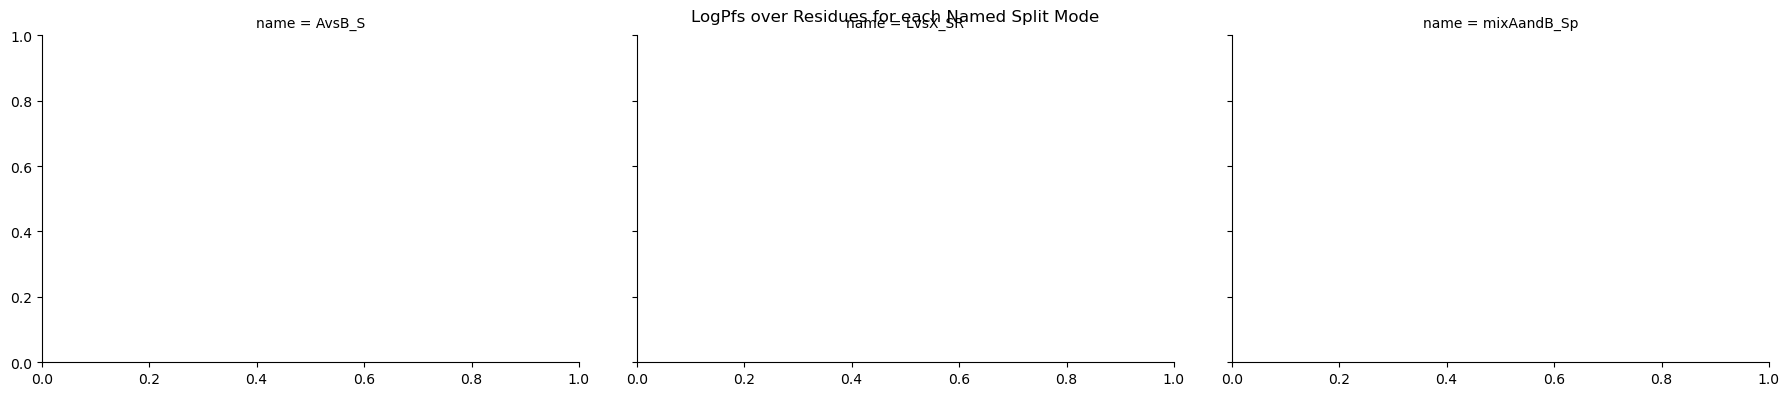

In [32]:
# plot LogPfs by Residues colour by calc_name facet wrap by name
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
LogPfs = pd.concat([analysis_dumps[i]["LogPfs"] for i in names])

print(LogPfs)

LogPfs_df = LogPfs.explode(['LogPf','Residues'])


# Create a FacetGrid, using 'name' for each subplot
g = sns.FacetGrid(LogPfs_df, col="name", col_wrap=3, height=4, aspect=1.5)
g.fig.suptitle('LogPfs over Residues for each Named Split Mode')

# Create lineplots
g = g.map(sns.lineplot, "Residues", "LogPf", "calc_name", palette="Set2")

# Adding some additional options for better visualization
g.add_legend(title='calc_name')
g.set_axis_labels("Residues", "LogPf")
g.set_titles("{col_name}")

# Adjust the arrangement of the plots
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()


                                               LogPf              calc_name  \
0  [1.412742265380934, 0.0, 0.0, 1.41274226538093...      train_LXRa_test_1   
1  [1.4, 7.949999999999999, 9.0, 9.0, 7.949999999...  no_weight_LXRa_test_1   
2  [1.412742265380934, 69.65217870342408, 70.7117...        val_LXRa_test_1   
3  [1.412742265380934, 69.65217870342408, 70.7117...       test_LXRa_test_1   
0  [3.5882529682870614, 15.25641576984737, 17.947...      train_LXRa_test_1   
1  [1.4, 7.949999999999999, 9.0, 9.0, 7.949999999...  no_weight_LXRa_test_1   
2  [18.84466873813443, 18.84466873813443, 20.6387...        val_LXRa_test_1   
3  [3.5882529682870614, 15.25641576984737, 17.947...       test_LXRa_test_1   
0  [1.2858231269356477, 0.0, 0.0, 1.2858231269356...      train_LXRa_test_1   
1  [1.4, 7.949999999999999, 9.0, 9.0, 7.949999999...  no_weight_LXRa_test_1   
2  [1.2858231269356477, 59.449022959096126, 60.41...        val_LXRa_test_1   
3  [1.2858231269356477, 59.449022959096126, 60.41...

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

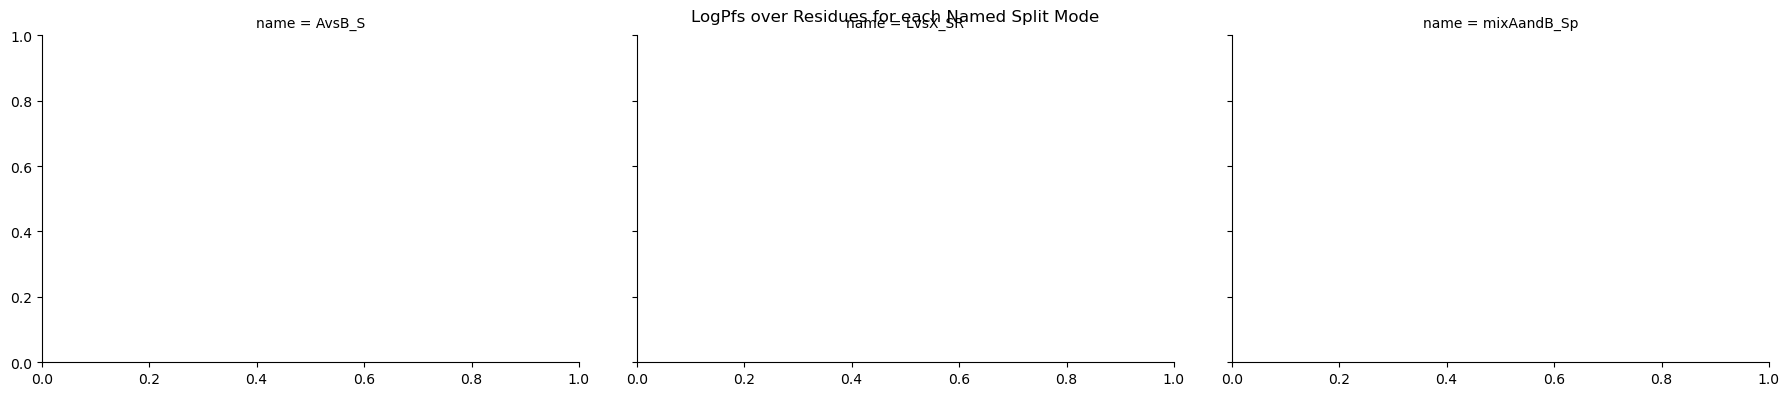

In [ ]:
# VDX.paths.head()

In [ ]:
# print(top_path)

In [ ]:
# pdb_test = mda.Universe(top_path)

# # write out as a pdb and add header
# pdb_test.atoms.write('test.pdb')
# with open('test.pdb', 'r') as original: data = original.read()
# with open('test.pdb', 'w') as modified: modified.write('HEADER    '+sim_name+'\n'+data)



In [ ]:


# def PDB_to_DSSP(top_path: str, dssp_path: str=None, sim_name: str=None):
#     """
#     Run DSSP on a PDB file to generate a DSSP file. Reads the output and returns a list of secondary structure elements.
#     Secondary structure elements are reduced to a single character: H (alpha helix), S (beta sheet), or L (loop).
#     Args:
#     - top_path (str): The path to the topology file to create the PDB file from.
#     - dssp_path (str): The path to save the DSSP file.
#     - sim_name (str): Simulation name to be included in the HEADER of the PDB file.
#     Returns:
#     - List of tuples, each containing the residue number and its secondary structure element.
#     """
#     temp_pdb = "do_mkdssp.pdb"

#     if sim_name is None:
#         sim_name = "DSSP HEADER"
#     if dssp_path is None:
#         dssp_path = "dssp_file.dssp"
#     print(top_path)
#     pdb_test = mda.Universe(top_path)

#     # write out as a pdb and add header
#     pdb_test.atoms.write(temp_pdb)


#     with open(temp_pdb, 'r') as original: data = original.read()
#     with open(temp_pdb, 'w') as modified: modified.write('HEADER    '+sim_name+'\n'+data)

#     # Run mkdssp to generate DSSP file
#     try:
#         subprocess.run(['mkdssp', temp_pdb,  dssp_path], check=True)
#     except subprocess.CalledProcessError as e:
#         print(f"Error running DSSP: {e}")
#         return []

#     # Parse the DSSP file
#     secondary_structures = []
#     with open(dssp_path, 'r') as dssp_file:
#         # Skip header lines
#         for line in dssp_file:
#             if line.startswith('  #  RESIDUE AA'):
#                 break
#         # Read the secondary structure assignments
#         for line in dssp_file:
#             if len(line) > 13:  # Ensure line has enough data
#                 residue_num = line[5:10].strip()
#                 ss = line[16]
#                 # Simplify the secondary structure to H, S, or L
#                 if ss in 'GHI':
#                     ss = 'H'  # Helix
#                 elif ss in 'EB':
#                     ss = 'S'  # Sheet
#                 else:
#                     ss = 'L'  # Loop or other
#                 secondary_structures.append((residue_num, ss))

#     # Cleanup temp PDB file
#     os.remove(temp_pdb)
#     os.remove(dssp_path)
#     print(len(secondary_structures))
#     print(len(pdb_test.residues))
#     return secondary_structures

